# Task 1

## Parts 1 to 3

In [48]:
import numpy as np
import itertools
import random
from keras.optimizers import Optimizer
import keras
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from geneticalgorithm import geneticalgorithm as ga
import pandas as pd
from itertools import combinations_with_replacement
import datetime
import json

In [49]:
# read in the .dat file as list of list
raw_data_lst = [i.strip().split() for i in open("./two_spirals.dat").readlines()]
raw_data_lst

[['4.47485', '-0.89004', '1'],
 ['-4.47485', '0.89004', '0'],
 ['4.50000', '0.00007', '1'],
 ['-4.50000', '-0.00007', '0'],
 ['4.35222', '0.86578', '1'],
 ['-4.35222', '-0.86578', '0'],
 ['4.04195', '1.67430', '1'],
 ['-4.04195', '-1.67430', '0'],
 ['3.58567', '2.39595', '1'],
 ['-3.58567', '-2.39595', '0'],
 ['3.00515', '3.00525', '1'],
 ['-3.00515', '-3.00525', '0'],
 ['2.32639', '3.48182', '1'],
 ['-2.32639', '-3.48182', '0'],
 ['1.57850', '3.81103', '1'],
 ['-1.57850', '-3.81103', '0'],
 ['0.79248', '3.98445', '1'],
 ['-0.79248', '-3.98445', '0'],
 ['-0.00007', '4.00000', '1'],
 ['0.00007', '-4.00000', '0'],
 ['-0.76824', '3.86183', '1'],
 ['0.76824', '-3.86183', '0'],
 ['-1.48297', '3.58000', '1'],
 ['1.48297', '-3.58000', '0'],
 ['-2.11817', '3.16994', '1'],
 ['2.11817', '-3.16994', '0'],
 ['-2.65170', '2.65160', '1'],
 ['2.65170', '-2.65160', '0'],
 ['-3.06609', '2.04860', '1'],
 ['3.06609', '-2.04860', '0'],
 ['-3.34909', '1.38716', '1'],
 ['3.34909', '-1.38716', '0'],
 ['-3.49

In [50]:
# Preprocessing and adding variables
# convert to numpy array
data = np.array(raw_data_lst)
X = data[:,:2]
y = data[:,2]

# Convert to float
X = X.astype(float)
y = y.astype(float)

# Add sin(x) and X^2
X = np.hstack((X, np.sin(X), X**2))

In [51]:
X.shape

(264, 6)

In [52]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    A = A.astype(float)
    Z = np.dot(W, A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [53]:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache


def tanh(Z):
    """
    Implement the tanh function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = 2/(1+np.exp(-2*Z)) - 1
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache


In [54]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
        
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
        
    elif activation == "tanh":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = tanh(Z)
        
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [55]:
def compute_cost(AL, Y):
    """
    Implement the cost function: binary cross entropy function

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- Binary cross entropy function
    """
    m = Y.shape[1]
    Y = Y.astype(float)
    AL = AL.astype(float)
    Y_pred = (AL >=0.5)*1
    
    # Compute loss from aL and y.
    cost = -np.sum(Y * np.log(AL) + (1-Y) * np.log(1-AL))/m
    # cost = -f1_score(Y,Y_pred,average = 'macro')
    
    cost = np.squeeze(cost)      
    assert(cost.shape == ())
    
    return cost

In [56]:
def evaluate_fitness_two_layer_model(X, Y, flattened_parameters, layers_dims, activation_fn1, activation_fn2):
    '''
    Wrapper function to evaluate fitness of neural network model with 1 hidden layer
    Flattened parameters stored in the order of W1, b1, W2, b2; row-wise
    '''
    
    (n_x, n_h, n_y) = layers_dims
    
    # Retrieve parameters
    W1 = flattened_parameters[:n_h*n_x].reshape(n_h,n_x)
    b1 = flattened_parameters[n_h*n_x:n_h*n_x + n_h].reshape(n_h,1)
    W2 = flattened_parameters[n_h*n_x + n_h : n_h*n_x + n_h + n_y*n_h].reshape(n_y,n_h)
    b2 = flattened_parameters[n_h*n_x + n_h + n_y*n_h:].reshape(n_y,1)
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    # Compute activation functions
    A1, cache1 = linear_activation_forward(X, W1, b1, activation_fn1)
    A2, cache2 = linear_activation_forward(A1, W2, b2, activation_fn2)
    
    # Compute fitness
    fitness = compute_cost(A2, Y)
    
    return fitness
    

In [57]:
def predict_two_layer_model(X, flattened_parameters, layers_dims, activation_fn1, activation_fn2):
    '''
    Wrapper function to predict neural network model with 1 hidden layer
    Flattened parameters stored in the order of W1, b1, W2, b2; row-wise
    '''
    
    (n_x, n_h, n_y) = layers_dims
    
    # Retrieve parameters
    W1 = flattened_parameters[:n_h*n_x].reshape(n_h,n_x)
    b1 = flattened_parameters[n_h*n_x:n_h*n_x + n_h].reshape(n_h,1)
    W2 = flattened_parameters[n_h*n_x + n_h : n_h*n_x + n_h + n_y*n_h].reshape(n_y,n_h)
    b2 = flattened_parameters[n_h*n_x + n_h + n_y*n_h:].reshape(n_y,1)
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    # Compute activation functions
    A1, cache1 = linear_activation_forward(X, W1, b1, activation_fn1)
    A2, cache2 = linear_activation_forward(A1, W2, b2, activation_fn2)
    
    return A2, (A2>=0.5)*1

In [58]:
# Modified from codes given in lecture

class Particle: # all the material that is relavant at the level of the individual particles
    
    def __init__(self, layers_dims, minx, maxx, X, Y, activation_fn1, activation_fn2):
        
        # Initialise things related to Neural Network
        self.X = X.astype(float)
        self.Y = Y.astype(float)
        self.activation_fn1 = activation_fn1
        self.activation_fn2 = activation_fn2
        self.layers_dims = layers_dims
        (n_x, n_h, n_y) = layers_dims
        self.dim = n_h*n_x + n_h + n_y*n_h + n_y
        
        # Initialise positions of the parameters
        self.position = np.random.uniform(low=minx, high=maxx, size=self.dim)
        self.velocity = np.random.uniform(low=-0.1, high=0.1, size=self.dim)
        self.best_particle_pos = self.position
        
        self.fitness = evaluate_fitness_two_layer_model(X, Y, self.position, layers_dims, activation_fn1, activation_fn2)
        self.best_particle_fitness = self.fitness   # we could start with very large number here, 
                                                    #but the actual value is better in case we are lucky 
                
    def setPos(self, pos):
        self.position = pos
        self.fitness = evaluate_fitness_two_layer_model(self.X, self.Y, self.position, self.layers_dims, self.activation_fn1, self.activation_fn2)
        if self.fitness<self.best_particle_fitness:     # to update the personal best both 
                                                        # position (for velocity update) and
                                                        # fitness (the new standard) are needed
                                                        # global best is update on swarm leven
            self.best_particle_fitness = self.fitness
            self.best_particle_pos = pos

    def updateVel(self, inertia, a1, a2, best_self_pos, best_swarm_pos):
                # Here we use the canonical version
                # V <- inertia*V + a1r1 (peronal_best - current_pos) + a2r2 (global_best - current_pos)
        cur_vel = self.velocity
        r1 = np.random.uniform(low=0, high=1, size = self.dim)
        r2 = np.random.uniform(low=0, high=1, size = self.dim)
        a1r1 = np.multiply(a1, r1)
        a2r2 = np.multiply(a2, r2)
        best_self_dif = np.subtract(best_self_pos, self.position)
        best_swarm_dif = np.subtract(best_swarm_pos, self.position)
                    # the next line is the main equation, namely the velocity update, 
                    # the velocities are added to the positions at swarm level 
        return inertia*cur_vel + np.multiply(a1r1, best_self_dif) + np.multiply(a2r2, best_swarm_dif)


In [59]:
class PSO: # all the material that is relavant at swarm level

    def __init__(self, w, a1, a2, layers_dims, population_size, time_steps, search_range, X, Y, activation_fn1, activation_fn2):

        # Here we use values that are (somewhat) known to be good
        # There are no "best" parameters (No Free Lunch), so try using different ones
        # There are several papers online which discuss various different tunings of a1 and a2
        # for different types of problems
        self.w = w # Inertia
        self.a1 = a1 # Attraction to personal best
        self.a2 = a2 # Attraction to global best
        
        # Variables related to the Neural Network
        self.X = X.astype(float)
        self.Y = Y.astype(float)
        self.activation_fn1 = activation_fn1
        self.activation_fn2 = activation_fn2
        (n_x, n_h, n_y) = layers_dims
        self.dim = n_h*n_x + n_h + n_y*n_h + n_y
        self.layers_dims = layers_dims

        self.swarm = [Particle(layers_dims,-search_range,search_range, X, Y, activation_fn1, activation_fn2) for i in range(population_size)]
        self.time_steps = time_steps
        print('init')

        # Initialising global best, you can wait until the end of the first time step
        # but creating a random initial best and fitness which is very high will mean you
        # do not have to write an if statement for the one off case
        self.best_swarm_pos = np.random.uniform(low=-1, high=1, size=self.dim)
        self.best_swarm_fitness = 1e100

    def run(self):
        for t in range(self.time_steps):
            for p in range(len(self.swarm)):
                particle = self.swarm[p]
                
                new_position = particle.position + particle.updateVel(self.w, self.a1, self.a2, particle.best_particle_pos, self.best_swarm_pos)
                #print(new_position)
                
                if new_position@new_position > 1.0e+18: # The search will be terminated if the distance 
                                                        # of any particle from center is too large
                    print('Time:', t,'Best Pos:',self.best_swarm_pos,'Best Fit:',self.best_swarm_fitness)
                    raise SystemExit('Most likely divergent: Decrease parameter values')
 
                self.swarm[p].setPos(new_position)
                
                new_fitness = evaluate_fitness_two_layer_model(self.X, self.Y, new_position, self.layers_dims, self.activation_fn1, self.activation_fn2)
                #print('new fitness', new_fitness)
        
                if new_fitness < self.best_swarm_fitness:   # to update the global best both 
                                                            # position (for velocity update) and
                                                            # fitness (the new group norm) are needed
                    self.best_swarm_fitness = new_fitness
                    self.best_swarm_pos = new_position
                    
            print('Time Step {} is Done'.format(t))

            if t % 100 == 0: #we print only two components even it search space is high-dimensional
                print("Time: %6d,  Best Fitness: %14.6f,  Best Pos: %9.4f,%9.4f" % (t,self.best_swarm_fitness,self.best_swarm_pos[0],self.best_swarm_pos[1]), end =" ")
                if self.dim>2: 
                    print('...')
                else:
                    print('')

In [60]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=100)

In [61]:
X_train_t = X_train.T.astype(float)
Y_train_t = y_train.reshape(1,len(y_train)).astype(float)

X_test_t = X_test.T.astype(float)
Y_test_t = y_test.reshape(1,len(y_test)).astype(float)

PSO_proc = PSO(w=0.7, a1=1.5, a2=1.6, layers_dims = (len(X_train_t), 8, 1) , population_size=30, time_steps=5001, search_range=0.1, X = X_train_t, Y = Y_train_t, activation_fn1 = 'tanh', activation_fn2 = 'sigmoid')
PSO_proc.run()

init
Time Step 0 is Done
Time:      0,  Best Fitness:       0.696652,  Best Pos:   -0.0309,  -0.0148 ...
Time Step 1 is Done
Time Step 2 is Done
Time Step 3 is Done
Time Step 4 is Done
Time Step 5 is Done
Time Step 6 is Done
Time Step 7 is Done
Time Step 8 is Done
Time Step 9 is Done
Time Step 10 is Done
Time Step 11 is Done
Time Step 12 is Done
Time Step 13 is Done
Time Step 14 is Done
Time Step 15 is Done
Time Step 16 is Done
Time Step 17 is Done
Time Step 18 is Done
Time Step 19 is Done
Time Step 20 is Done
Time Step 21 is Done
Time Step 22 is Done
Time Step 23 is Done
Time Step 24 is Done
Time Step 25 is Done
Time Step 26 is Done
Time Step 27 is Done
Time Step 28 is Done
Time Step 29 is Done
Time Step 30 is Done
Time Step 31 is Done
Time Step 32 is Done
Time Step 33 is Done
Time Step 34 is Done
Time Step 35 is Done
Time Step 36 is Done
Time Step 37 is Done
Time Step 38 is Done
Time Step 39 is Done
Time Step 40 is Done
Time Step 41 is Done
Time Step 42 is Done
Time Step 43 is Done
T

Time Step 369 is Done
Time Step 370 is Done
Time Step 371 is Done
Time Step 372 is Done
Time Step 373 is Done
Time Step 374 is Done
Time Step 375 is Done
Time Step 376 is Done
Time Step 377 is Done
Time Step 378 is Done
Time Step 379 is Done
Time Step 380 is Done
Time Step 381 is Done
Time Step 382 is Done
Time Step 383 is Done
Time Step 384 is Done
Time Step 385 is Done
Time Step 386 is Done
Time Step 387 is Done
Time Step 388 is Done
Time Step 389 is Done
Time Step 390 is Done
Time Step 391 is Done
Time Step 392 is Done
Time Step 393 is Done
Time Step 394 is Done
Time Step 395 is Done
Time Step 396 is Done
Time Step 397 is Done
Time Step 398 is Done
Time Step 399 is Done
Time Step 400 is Done
Time:    400,  Best Fitness:       0.413339,  Best Pos:   -0.2289,   0.3484 ...
Time Step 401 is Done
Time Step 402 is Done
Time Step 403 is Done
Time Step 404 is Done
Time Step 405 is Done
Time Step 406 is Done
Time Step 407 is Done
Time Step 408 is Done
Time Step 409 is Done
Time Step 410 is D

Time Step 763 is Done
Time Step 764 is Done
Time Step 765 is Done
Time Step 766 is Done
Time Step 767 is Done
Time Step 768 is Done
Time Step 769 is Done
Time Step 770 is Done
Time Step 771 is Done
Time Step 772 is Done
Time Step 773 is Done
Time Step 774 is Done
Time Step 775 is Done
Time Step 776 is Done
Time Step 777 is Done
Time Step 778 is Done
Time Step 779 is Done
Time Step 780 is Done
Time Step 781 is Done
Time Step 782 is Done
Time Step 783 is Done
Time Step 784 is Done
Time Step 785 is Done
Time Step 786 is Done
Time Step 787 is Done
Time Step 788 is Done
Time Step 789 is Done
Time Step 790 is Done
Time Step 791 is Done
Time Step 792 is Done
Time Step 793 is Done
Time Step 794 is Done
Time Step 795 is Done
Time Step 796 is Done
Time Step 797 is Done
Time Step 798 is Done
Time Step 799 is Done
Time Step 800 is Done
Time:    800,  Best Fitness:       0.297078,  Best Pos:   -0.3826,   0.3529 ...
Time Step 801 is Done
Time Step 802 is Done
Time Step 803 is Done
Time Step 804 is D

Time Step 1147 is Done
Time Step 1148 is Done
Time Step 1149 is Done
Time Step 1150 is Done
Time Step 1151 is Done
Time Step 1152 is Done
Time Step 1153 is Done
Time Step 1154 is Done
Time Step 1155 is Done
Time Step 1156 is Done
Time Step 1157 is Done
Time Step 1158 is Done
Time Step 1159 is Done
Time Step 1160 is Done
Time Step 1161 is Done
Time Step 1162 is Done
Time Step 1163 is Done
Time Step 1164 is Done
Time Step 1165 is Done
Time Step 1166 is Done
Time Step 1167 is Done
Time Step 1168 is Done
Time Step 1169 is Done
Time Step 1170 is Done
Time Step 1171 is Done
Time Step 1172 is Done
Time Step 1173 is Done
Time Step 1174 is Done
Time Step 1175 is Done
Time Step 1176 is Done
Time Step 1177 is Done
Time Step 1178 is Done
Time Step 1179 is Done
Time Step 1180 is Done
Time Step 1181 is Done
Time Step 1182 is Done
Time Step 1183 is Done
Time Step 1184 is Done
Time Step 1185 is Done
Time Step 1186 is Done
Time Step 1187 is Done
Time Step 1188 is Done
Time Step 1189 is Done
Time Step 1

Time Step 1498 is Done
Time Step 1499 is Done
Time Step 1500 is Done
Time:   1500,  Best Fitness:       0.233883,  Best Pos:   -0.4149,   0.4093 ...
Time Step 1501 is Done
Time Step 1502 is Done
Time Step 1503 is Done
Time Step 1504 is Done
Time Step 1505 is Done
Time Step 1506 is Done
Time Step 1507 is Done
Time Step 1508 is Done
Time Step 1509 is Done
Time Step 1510 is Done
Time Step 1511 is Done
Time Step 1512 is Done
Time Step 1513 is Done
Time Step 1514 is Done
Time Step 1515 is Done
Time Step 1516 is Done
Time Step 1517 is Done
Time Step 1518 is Done
Time Step 1519 is Done
Time Step 1520 is Done
Time Step 1521 is Done
Time Step 1522 is Done
Time Step 1523 is Done
Time Step 1524 is Done
Time Step 1525 is Done
Time Step 1526 is Done
Time Step 1527 is Done
Time Step 1528 is Done
Time Step 1529 is Done
Time Step 1530 is Done
Time Step 1531 is Done
Time Step 1532 is Done
Time Step 1533 is Done
Time Step 1534 is Done
Time Step 1535 is Done
Time Step 1536 is Done
Time Step 1537 is Done


Time Step 1850 is Done
Time Step 1851 is Done
Time Step 1852 is Done
Time Step 1853 is Done
Time Step 1854 is Done
Time Step 1855 is Done
Time Step 1856 is Done
Time Step 1857 is Done
Time Step 1858 is Done
Time Step 1859 is Done
Time Step 1860 is Done
Time Step 1861 is Done
Time Step 1862 is Done
Time Step 1863 is Done
Time Step 1864 is Done
Time Step 1865 is Done
Time Step 1866 is Done
Time Step 1867 is Done
Time Step 1868 is Done
Time Step 1869 is Done
Time Step 1870 is Done
Time Step 1871 is Done
Time Step 1872 is Done
Time Step 1873 is Done
Time Step 1874 is Done
Time Step 1875 is Done
Time Step 1876 is Done
Time Step 1877 is Done
Time Step 1878 is Done
Time Step 1879 is Done
Time Step 1880 is Done
Time Step 1881 is Done
Time Step 1882 is Done
Time Step 1883 is Done
Time Step 1884 is Done
Time Step 1885 is Done
Time Step 1886 is Done
Time Step 1887 is Done
Time Step 1888 is Done
Time Step 1889 is Done
Time Step 1890 is Done
Time Step 1891 is Done
Time Step 1892 is Done
Time Step 1

Time Step 2200 is Done
Time:   2200,  Best Fitness:       0.227315,  Best Pos:   -0.3316,   0.4875 ...
Time Step 2201 is Done
Time Step 2202 is Done
Time Step 2203 is Done
Time Step 2204 is Done
Time Step 2205 is Done
Time Step 2206 is Done
Time Step 2207 is Done
Time Step 2208 is Done
Time Step 2209 is Done
Time Step 2210 is Done
Time Step 2211 is Done
Time Step 2212 is Done
Time Step 2213 is Done
Time Step 2214 is Done
Time Step 2215 is Done
Time Step 2216 is Done
Time Step 2217 is Done
Time Step 2218 is Done
Time Step 2219 is Done
Time Step 2220 is Done
Time Step 2221 is Done
Time Step 2222 is Done
Time Step 2223 is Done
Time Step 2224 is Done
Time Step 2225 is Done
Time Step 2226 is Done
Time Step 2227 is Done
Time Step 2228 is Done
Time Step 2229 is Done
Time Step 2230 is Done
Time Step 2231 is Done
Time Step 2232 is Done
Time Step 2233 is Done
Time Step 2234 is Done
Time Step 2235 is Done
Time Step 2236 is Done
Time Step 2237 is Done
Time Step 2238 is Done
Time Step 2239 is Done


Time Step 2552 is Done
Time Step 2553 is Done
Time Step 2554 is Done
Time Step 2555 is Done
Time Step 2556 is Done
Time Step 2557 is Done
Time Step 2558 is Done
Time Step 2559 is Done
Time Step 2560 is Done
Time Step 2561 is Done
Time Step 2562 is Done
Time Step 2563 is Done
Time Step 2564 is Done
Time Step 2565 is Done
Time Step 2566 is Done
Time Step 2567 is Done
Time Step 2568 is Done
Time Step 2569 is Done
Time Step 2570 is Done
Time Step 2571 is Done
Time Step 2572 is Done
Time Step 2573 is Done
Time Step 2574 is Done
Time Step 2575 is Done
Time Step 2576 is Done
Time Step 2577 is Done
Time Step 2578 is Done
Time Step 2579 is Done
Time Step 2580 is Done
Time Step 2581 is Done
Time Step 2582 is Done
Time Step 2583 is Done
Time Step 2584 is Done
Time Step 2585 is Done
Time Step 2586 is Done
Time Step 2587 is Done
Time Step 2588 is Done
Time Step 2589 is Done
Time Step 2590 is Done
Time Step 2591 is Done
Time Step 2592 is Done
Time Step 2593 is Done
Time Step 2594 is Done
Time Step 2

Time Step 2905 is Done
Time Step 2906 is Done
Time Step 2907 is Done
Time Step 2908 is Done
Time Step 2909 is Done
Time Step 2910 is Done
Time Step 2911 is Done
Time Step 2912 is Done
Time Step 2913 is Done
Time Step 2914 is Done
Time Step 2915 is Done
Time Step 2916 is Done
Time Step 2917 is Done
Time Step 2918 is Done
Time Step 2919 is Done
Time Step 2920 is Done
Time Step 2921 is Done
Time Step 2922 is Done
Time Step 2923 is Done
Time Step 2924 is Done
Time Step 2925 is Done
Time Step 2926 is Done
Time Step 2927 is Done
Time Step 2928 is Done
Time Step 2929 is Done
Time Step 2930 is Done
Time Step 2931 is Done
Time Step 2932 is Done
Time Step 2933 is Done
Time Step 2934 is Done
Time Step 2935 is Done
Time Step 2936 is Done
Time Step 2937 is Done
Time Step 2938 is Done
Time Step 2939 is Done
Time Step 2940 is Done
Time Step 2941 is Done
Time Step 2942 is Done
Time Step 2943 is Done
Time Step 2944 is Done
Time Step 2945 is Done
Time Step 2946 is Done
Time Step 2947 is Done
Time Step 2

Time Step 3287 is Done
Time Step 3288 is Done
Time Step 3289 is Done
Time Step 3290 is Done
Time Step 3291 is Done
Time Step 3292 is Done
Time Step 3293 is Done
Time Step 3294 is Done
Time Step 3295 is Done
Time Step 3296 is Done
Time Step 3297 is Done
Time Step 3298 is Done
Time Step 3299 is Done
Time Step 3300 is Done
Time:   3300,  Best Fitness:       0.190931,  Best Pos:   -0.4864,   0.4903 ...
Time Step 3301 is Done
Time Step 3302 is Done
Time Step 3303 is Done
Time Step 3304 is Done
Time Step 3305 is Done
Time Step 3306 is Done
Time Step 3307 is Done
Time Step 3308 is Done
Time Step 3309 is Done
Time Step 3310 is Done
Time Step 3311 is Done
Time Step 3312 is Done
Time Step 3313 is Done
Time Step 3314 is Done
Time Step 3315 is Done
Time Step 3316 is Done
Time Step 3317 is Done
Time Step 3318 is Done
Time Step 3319 is Done
Time Step 3320 is Done
Time Step 3321 is Done
Time Step 3322 is Done
Time Step 3323 is Done
Time Step 3324 is Done
Time Step 3325 is Done
Time Step 3326 is Done


Time Step 3639 is Done
Time Step 3640 is Done
Time Step 3641 is Done
Time Step 3642 is Done
Time Step 3643 is Done
Time Step 3644 is Done
Time Step 3645 is Done
Time Step 3646 is Done
Time Step 3647 is Done
Time Step 3648 is Done
Time Step 3649 is Done
Time Step 3650 is Done
Time Step 3651 is Done
Time Step 3652 is Done
Time Step 3653 is Done
Time Step 3654 is Done
Time Step 3655 is Done
Time Step 3656 is Done
Time Step 3657 is Done
Time Step 3658 is Done
Time Step 3659 is Done
Time Step 3660 is Done
Time Step 3661 is Done
Time Step 3662 is Done
Time Step 3663 is Done
Time Step 3664 is Done
Time Step 3665 is Done
Time Step 3666 is Done
Time Step 3667 is Done
Time Step 3668 is Done
Time Step 3669 is Done
Time Step 3670 is Done
Time Step 3671 is Done
Time Step 3672 is Done
Time Step 3673 is Done
Time Step 3674 is Done
Time Step 3675 is Done
Time Step 3676 is Done
Time Step 3677 is Done
Time Step 3678 is Done
Time Step 3679 is Done
Time Step 3680 is Done
Time Step 3681 is Done
Time Step 3

Time Step 3992 is Done
Time Step 3993 is Done
Time Step 3994 is Done
Time Step 3995 is Done
Time Step 3996 is Done
Time Step 3997 is Done
Time Step 3998 is Done
Time Step 3999 is Done
Time Step 4000 is Done
Time:   4000,  Best Fitness:       0.169803,  Best Pos:   -0.4892,   0.5298 ...
Time Step 4001 is Done
Time Step 4002 is Done
Time Step 4003 is Done
Time Step 4004 is Done
Time Step 4005 is Done
Time Step 4006 is Done
Time Step 4007 is Done
Time Step 4008 is Done
Time Step 4009 is Done
Time Step 4010 is Done
Time Step 4011 is Done
Time Step 4012 is Done
Time Step 4013 is Done
Time Step 4014 is Done
Time Step 4015 is Done
Time Step 4016 is Done
Time Step 4017 is Done
Time Step 4018 is Done
Time Step 4019 is Done
Time Step 4020 is Done
Time Step 4021 is Done
Time Step 4022 is Done
Time Step 4023 is Done
Time Step 4024 is Done
Time Step 4025 is Done
Time Step 4026 is Done
Time Step 4027 is Done
Time Step 4028 is Done
Time Step 4029 is Done
Time Step 4030 is Done
Time Step 4031 is Done


Time Step 4362 is Done
Time Step 4363 is Done
Time Step 4364 is Done
Time Step 4365 is Done
Time Step 4366 is Done
Time Step 4367 is Done
Time Step 4368 is Done
Time Step 4369 is Done
Time Step 4370 is Done
Time Step 4371 is Done
Time Step 4372 is Done
Time Step 4373 is Done
Time Step 4374 is Done
Time Step 4375 is Done
Time Step 4376 is Done
Time Step 4377 is Done
Time Step 4378 is Done
Time Step 4379 is Done
Time Step 4380 is Done
Time Step 4381 is Done
Time Step 4382 is Done
Time Step 4383 is Done
Time Step 4384 is Done
Time Step 4385 is Done
Time Step 4386 is Done
Time Step 4387 is Done
Time Step 4388 is Done
Time Step 4389 is Done
Time Step 4390 is Done
Time Step 4391 is Done
Time Step 4392 is Done
Time Step 4393 is Done
Time Step 4394 is Done
Time Step 4395 is Done
Time Step 4396 is Done
Time Step 4397 is Done
Time Step 4398 is Done
Time Step 4399 is Done
Time Step 4400 is Done
Time:   4400,  Best Fitness:       0.168628,  Best Pos:   -0.4715,   0.4998 ...
Time Step 4401 is Done


Time Step 4718 is Done
Time Step 4719 is Done
Time Step 4720 is Done
Time Step 4721 is Done
Time Step 4722 is Done
Time Step 4723 is Done
Time Step 4724 is Done
Time Step 4725 is Done
Time Step 4726 is Done
Time Step 4727 is Done
Time Step 4728 is Done
Time Step 4729 is Done
Time Step 4730 is Done
Time Step 4731 is Done
Time Step 4732 is Done
Time Step 4733 is Done
Time Step 4734 is Done
Time Step 4735 is Done
Time Step 4736 is Done
Time Step 4737 is Done
Time Step 4738 is Done
Time Step 4739 is Done
Time Step 4740 is Done
Time Step 4741 is Done
Time Step 4742 is Done
Time Step 4743 is Done
Time Step 4744 is Done
Time Step 4745 is Done
Time Step 4746 is Done
Time Step 4747 is Done
Time Step 4748 is Done
Time Step 4749 is Done
Time Step 4750 is Done
Time Step 4751 is Done
Time Step 4752 is Done
Time Step 4753 is Done
Time Step 4754 is Done
Time Step 4755 is Done
Time Step 4756 is Done
Time Step 4757 is Done
Time Step 4758 is Done
Time Step 4759 is Done
Time Step 4760 is Done
Time Step 4

In [62]:
PSO_proc.best_swarm_pos

array([-0.52682496,  0.50575454,  1.82504329, -2.90782654, -0.68011647,
       -0.24912478,  1.18195785, -2.07737196, -0.30159648, -2.06158734,
       -1.66654936, -3.4267117 ,  0.9271331 ,  2.82917857,  1.83386819,
        0.56872982, -1.83350698,  0.4675575 , -0.82790447, -2.53748954,
       -0.36704282,  1.53760987, -0.3104508 , -0.40685247,  2.09508476,
       -1.30226151,  0.21523199,  2.2348884 , -0.65941056, -1.71959849,
        0.77205766, -0.1450259 , -0.57761363, -1.91200725, -2.40241124,
        0.97665018, -1.19100334, -1.38663924,  2.06676895, -3.1474496 ,
        0.9665287 ,  1.07728372,  1.99980548, -1.05689763, -1.94777675,
        0.89611654, -0.42705925,  0.6192867 ,  5.59062107,  0.29568997,
       -2.06835695,  2.61870104,  2.40372453, -2.50732472, -1.91368261,
       -3.4808565 ,  4.21980045,  3.78716923, -4.41471826, -4.57058382,
       -2.79344872, -1.68559827, -1.11044385,  2.58310031, -0.59760443])

In [63]:
# Evaluate fitness on training data
evaluate_fitness_two_layer_model(X_train_t, Y_train_t, PSO_proc.best_swarm_pos , (len(X_train_t), 8, 1), 'tanh', 'sigmoid')

0.15967212457491264

In [64]:
# Evaluate fitness on test data
evaluate_fitness_two_layer_model(X_test_t, Y_test_t, PSO_proc.best_swarm_pos , (len(X_test_t), 8, 1), 'tanh', 'sigmoid')

0.7438484499823396

In [65]:
# Check the predictions
est_prob, y_pred = predict_two_layer_model(X_test_t, PSO_proc.best_swarm_pos , (len(X_test_t), 8, 1), 'tanh', 'sigmoid')

In [66]:
# Check the accuracy as a sanity check
print('Accuracy is {}'.format(round(np.mean(np.squeeze(y_pred) == np.squeeze(Y_test_t)),2)))

Accuracy is 0.73


In [67]:
# Visualising the Test set results
def visualise_results(X_test, y_test, best_weights, layers_dims, activation_fn1, activation_fn2):
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0.5, stop = X_set[:, 0].max() + 0.5, step = 0.05),
                         np.arange(start = X_set[:, 1].min() - 0.5, stop = X_set[:, 1].max() + 0.5, step = 0.05))


    est_prob, y_pred = predict_two_layer_model(np.array([X1.ravel(), X2.ravel(), np.sin(X1.ravel()), np.sin(X2.ravel()), X1.ravel()**2, X2.ravel()**2]),
                                              best_weights,layers_dims,activation_fn1,activation_fn2)

    plt.contourf(X1, X2, y_pred.reshape(X1.shape),
                 alpha = 0.65, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('Neural Network (Test set)')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.show()
    
    return

W1125 14:30:05.850778  9020 _axes.py:4217] 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
W1125 14:30:05.853736  9020 _axes.py:4217] 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


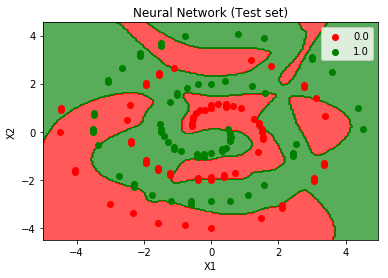

In [68]:
visualise_results(X_test, y_test, PSO_proc.best_swarm_pos , (len(X_test_t), 8, 1), 'tanh', 'sigmoid')

## Part 4 and 5

In [69]:
def get_W_b_dim(layers_dims):
    '''
    Get the dimensions for W and b in each layer specified by layers_dim
    in format of a list [(W1, b1), (W2, b2),...]
    '''
    W_dim_lst = list(zip(layers_dims[1:], layers_dims[:-1]))
    b_dim_lst = list(zip(layers_dims[1:], np.ones(len(layers_dims)-1).astype(int)))

    dim_lst = list(zip(W_dim_lst,b_dim_lst))
    return dim_lst
    

In [70]:
def compute_dim(layers_dims):
    '''
    Compute the dimensions required for the flattened parameters
    '''
    
    # Get the W_dim_lst
    W_dim_lst = list(zip(layers_dims[1:], layers_dims[:-1]))
    
    # Compute the dimensions required
    dim = np.sum([W_dim[0] * W_dim[1] for W_dim in W_dim_lst]) + np.sum(layers_dims[1:])
    
    return dim

In [71]:
def evaluate_fitness_dl(X, Y, flattened_parameters, layers_dims, activation_fn_lst):
    '''
    Wrapper function to evaluate fitness of a deep neural network model with multiple hidden layers
    Flattened parameters stored in the order of W1, b1, W2, b2; row-wise
    '''
    
    assert(len(layers_dims)-1 == len(activation_fn_lst))
    
    # Initialise a list to store tuples containing the shape of the matrices
    # in the order of (W_dim, b_dim).
    # So the list would look like [(W1,b1),(W2, b2)...]
    dim_lst = []
    
    # Initialise a list to store the parameter matrices in the form: [(W1, b1),(W2, b2)...]
    param_lst = []
    
    # Initialise moving_start_index to keep track of where the flattened parameters have been read till
    moving_start_index = 0
    
    # Retrieve parameters, store the dimensions, then compute activation functions
    for i in range(len(layers_dims)):
        if i == 0:
            continue
            
        # The relation starts from 2nd element
        W_dim = (layers_dims[i], layers_dims[i-1])
        b_dim = (layers_dims[i],1)
        dim_lst.append((W_dim, b_dim))
        
        # Obtain W and update the moving_start_index
        W = flattened_parameters[moving_start_index: moving_start_index + (W_dim[0] * W_dim[1])].reshape(W_dim[0], W_dim[1])
        moving_start_index = moving_start_index + (W_dim[0] * W_dim[1])
        
        # Obtain b and update the moving_start_index
        b = flattened_parameters[moving_start_index: moving_start_index + b_dim[0]].reshape(b_dim[0], b_dim[1])
        moving_start_index = moving_start_index + b_dim[0]
        
        # Update param_lst
        param_lst.append((W,b))
        
        # Compute activation functions
        # If i = 1, it implies it is the first layer (i.e. first computation)
        if i == 1:
            A, cache = linear_activation_forward(X, W, b, activation_fn_lst[i-1])
        else:
            A, cache = linear_activation_forward(A, W, b, activation_fn_lst[i-1])
    
    # Compute fitness
    fitness = compute_cost(A, Y)
    
    return fitness
    

In [72]:
def evaluate_fitness_dl_shortened(X, Y, flattened_parameters, layers_dims, activation_fn_lst):
    '''
    Wrapper function to evaluate fitness of a deep neural network model with multiple hidden layers
    Flattened parameters stored in the order of W1, b1, W2, b2; row-wise
    '''
    
    assert(len(layers_dims)-1 == len(activation_fn_lst))
    
    # Get a list to store tuples containing the shape of the matrices
    # in the order of (W_dim, b_dim).
    # So the list would look like [(W1,b1),(W2, b2)...]
    dim_lst = get_W_b_dim(layers_dims)
    
    # Initialise a list to store the parameter matrices in the form: [(W1, b1),(W2, b2)...]
    param_lst = []
    
    # Initialise moving_start_index to keep track of where the flattened parameters have been read till
    moving_start_index = 0
    
    # Intialise i
    i = 0
    
    # Retrieve parameters, store the dimensions, then compute activation functions
    for W_b_tup in dim_lst:
        
        # Unpack dimensions
        W_dim, b_dim = W_b_tup
        
        # Obtain W and update the moving_start_index
        W = flattened_parameters[moving_start_index: moving_start_index + (W_dim[0] * W_dim[1])].reshape(W_dim[0], W_dim[1])
        moving_start_index = moving_start_index + (W_dim[0] * W_dim[1])
        
        # Obtain b and update the moving_start_index
        b = flattened_parameters[moving_start_index: moving_start_index + b_dim[0]].reshape(b_dim[0], b_dim[1])
        moving_start_index = moving_start_index + b_dim[0]
        
        # Update param_lst
        param_lst.append((W,b))
        
        # Compute activation functions
        # If i = 0, it implies it is the first layer (i.e. first computation)
        if i == 0:
            A, cache = linear_activation_forward(X, W, b, activation_fn_lst[i-1])
            i+=1
        else:
            A, cache = linear_activation_forward(A, W, b, activation_fn_lst[i-1])
        
    
    # Compute fitness
    fitness = compute_cost(A, Y)
    
    return fitness
    

In [73]:
# %%timeit
# # Seeing how fast each function runs
# layers_dims = (len(X_train_t),8,4,4,1)
# evaluate_fitness_dl_shortened(X_train_t, Y_train_t, np.ones(compute_dim(layers_dims)), layers_dims, ['tanh','tanh','tanh','sigmoid'])

In [74]:
# %%timeit
# # Seeing how fast each function runs
# layers_dims = (len(X_train_t),8,4,4,1)
# evaluate_fitness_dl(X_train_t, Y_train_t, np.ones(compute_dim(layers_dims)), layers_dims, ['tanh','tanh','tanh','sigmoid'])

In [75]:
def predict_dl_model(X, flattened_parameters, layers_dims, activation_fn_lst):
    '''
    Wrapper function to predict neural network model with multiple hidden layer
    Flattened parameters stored in the order of W1, b1, W2, b2; row-wise
    
    Outputs the predicted probabilities, predicted labels and all_cache_info which contains all the Weight Matrix etc.
    '''
    # Initialise a list to store tuples containing the shape of the matrices
    # in the order of (W_dim, b_dim).
    # So the list would look like [(W1,b1),(W2, b2)...]
    dim_lst = []
    
    # Initialise a list to store the parameter matrices in the form: [(W1, b1),(W2, b2)...]
    param_lst = []
    
    # Initialise a list to store 
    cache_lst = []
    
    # Initialise moving_start_index to keep track of where the flattened parameters have been read till
    moving_start_index = 0
    
    # Retrieve parameters, store the dimensions, then compute activation functions
    for i in range(len(layers_dims)):
        if i == 0:
            continue
            
        # The relation starts from 2nd element
        W_dim = (layers_dims[i], layers_dims[i-1])
        b_dim = (layers_dims[i],1)
        dim_lst.append((W_dim, b_dim))
        
        # Obtain W and update the moving_start_index
        W = flattened_parameters[moving_start_index: moving_start_index + (W_dim[0] * W_dim[1])].reshape(W_dim[0], W_dim[1])
        moving_start_index = moving_start_index + (W_dim[0] * W_dim[1])
        
        # Obtain b and update the moving_start_index
        b = flattened_parameters[moving_start_index: moving_start_index + b_dim[0]].reshape(b_dim[0], b_dim[1])
        moving_start_index = moving_start_index + b_dim[0]
        
        # Update param_lst
        param_lst.append((W,b))
        
        # Compute activation functions
        # If i = 1, it implies it is the first layer (i.e. first computation)
        if i == 1:
            A, cache = linear_activation_forward(X, W, b, activation_fn_lst[i-1])
        else:
            A, cache = linear_activation_forward(A, W, b, activation_fn_lst[i-1])
            
        cache_lst.append(cache)
            
    all_cache_info = (param_lst,dim_lst,cache_lst)
    
    return A, (A>=0.5)*1, all_cache_info

In [76]:
# To update PSO and Particle Classes for this
# Modified from codes given in lecture

class Particle_dl: # all the material that is relavant at the level of the individual particles
    
    def __init__(self, layers_dims, minx, maxx, X, Y, activation_fn_lst):
        
        # Initialise things related to Neural Network
        self.X = X.astype(float)
        self.Y = Y.astype(float)
        self.activation_fn_lst = activation_fn_lst
        self.layers_dims = layers_dims
        
        self.dim = compute_dim(layers_dims)
        
        # Initialise positions of the parameters
        self.position = np.random.uniform(low=minx, high=maxx, size=self.dim)
        self.velocity = np.random.uniform(low=-0.1, high=0.1, size=self.dim)
        self.best_particle_pos = self.position
        
        self.fitness = evaluate_fitness_dl(X, Y, self.position, layers_dims, activation_fn_lst)
        self.best_particle_fitness = self.fitness   # we could start with very large number here, 
                                                    #but the actual value is better in case we are lucky 
                
    def setPos(self, pos):
        self.position = pos
        self.fitness = evaluate_fitness_dl(self.X, self.Y, self.position, self.layers_dims, self.activation_fn_lst)
        if self.fitness<self.best_particle_fitness:     # to update the personal best both 
                                                        # position (for velocity update) and
                                                        # fitness (the new standard) are needed
                                                        # global best is update on swarm leven
            self.best_particle_fitness = self.fitness
            self.best_particle_pos = pos

    def updateVel(self, inertia, a1, a2, best_self_pos, best_swarm_pos):
                # Here we use the canonical version
                # V <- inertia*V + a1r1 (peronal_best - current_pos) + a2r2 (global_best - current_pos)
        cur_vel = self.velocity
        r1 = np.random.uniform(low=0, high=1, size = self.dim)
        r2 = np.random.uniform(low=0, high=1, size = self.dim)
        a1r1 = np.multiply(a1, r1)
        a2r2 = np.multiply(a2, r2)
        best_self_dif = np.subtract(best_self_pos, self.position)
        best_swarm_dif = np.subtract(best_swarm_pos, self.position)
                    # the next line is the main equation, namely the velocity update, 
                    # the velocities are added to the positions at swarm level 
        return inertia*cur_vel + np.multiply(a1r1, best_self_dif) + np.multiply(a2r2, best_swarm_dif)


In [77]:
class PSO_dl: # all the material that is relavant at swarm level

    def __init__(self, w, a1, a2, layers_dims, population_size, time_steps, search_range, X, Y, activation_fn_lst):
        
        random.seed(100)

        # Here we use values that are (somewhat) known to be good
        # There are no "best" parameters (No Free Lunch), so try using different ones
        # There are several papers online which discuss various different tunings of a1 and a2
        # for different types of problems
        self.w = w # Inertia
        self.a1 = a1 # Attraction to personal best
        self.a2 = a2 # Attraction to global best
        
        # Variables related to the Neural Network
        self.X = X.astype(float)
        self.Y = Y.astype(float)
        self.activation_fn_lst = activation_fn_lst
        self.layers_dims = layers_dims
        self.dim = compute_dim(layers_dims)

        self.swarm = [Particle_dl(layers_dims,-search_range,search_range, X, Y, activation_fn_lst) for i in range(population_size)]
        self.time_steps = time_steps
        print('init')

        # Initialising global best, you can wait until the end of the first time step
        # but creating a random initial best and fitness which is very high will mean you
        # do not have to write an if statement for the one off case
        self.best_swarm_pos = np.random.uniform(low=-1, high=1, size=self.dim)
        self.best_swarm_fitness = 1e100

    def run(self):
        for t in range(self.time_steps):
            for p in range(len(self.swarm)):
                particle = self.swarm[p]
                
                new_position = particle.position + particle.updateVel(self.w, self.a1, self.a2, particle.best_particle_pos, self.best_swarm_pos)
                #print(new_position)
                
                if new_position@new_position > 1.0e+18: # The search will be terminated if the distance 
                                                        # of any particle from center is too large
                    print('Time:', t,'Best Pos:',self.best_swarm_pos,'Best Fit:',self.best_swarm_fitness)
                    raise SystemExit('Most likely divergent: Decrease parameter values')
 
                self.swarm[p].setPos(new_position)
                
                new_fitness = evaluate_fitness_dl(self.X, self.Y, new_position, self.layers_dims, self.activation_fn_lst)
                #print('new fitness', new_fitness)
        
                if new_fitness < self.best_swarm_fitness:   # to update the global best both 
                                                            # position (for velocity update) and
                                                            # fitness (the new group norm) are needed
                    self.best_swarm_fitness = new_fitness
                    self.best_swarm_pos = new_position
                    
            #print('Time Step {} is Done'.format(t))

            if t % 100 == 0: #we print only two components even it search space is high-dimensional
                print("Time: %6d,  Best Fitness: %14.6f,  Best Pos: %9.4f,%9.4f" % (t,self.best_swarm_fitness,self.best_swarm_pos[0],self.best_swarm_pos[1]), end =" ")
                if self.dim>2: 
                    print('...')
                else:
                    print('')

In [78]:
# We can only use linear features so we take x1 and x2
X_train_linear_t = X_train[:,:2].T.astype(float)
Y_train_t = y_train.reshape(1,len(y_train)).astype(float)

X_test_linear_t = X_test[:,:2].T.astype(float)
Y_test_t = y_test.reshape(1,len(y_test)).astype(float)

PSO_dl_proc = PSO_dl(w=0.7, a1=1.5, a2=1.65, layers_dims = (len(X_train_linear_t), 4, 2, 1) , population_size=30, time_steps=1001, search_range=0.1, X = X_train_linear_t, Y = Y_train_t, activation_fn_lst = ['tanh','relu','sigmoid'])
PSO_dl_proc.run()

init
Time:      0,  Best Fitness:       0.691518,  Best Pos:   -0.0265,  -0.0672 ...
Time:    100,  Best Fitness:       0.608751,  Best Pos:   -0.2872,  -1.3858 ...
Time:    200,  Best Fitness:       0.597882,  Best Pos:   -0.3099,  -1.3598 ...
Time:    300,  Best Fitness:       0.591514,  Best Pos:   -0.2855,  -1.3014 ...
Time:    400,  Best Fitness:       0.578275,  Best Pos:   -0.2651,  -1.3710 ...
Time:    500,  Best Fitness:       0.578275,  Best Pos:   -0.2651,  -1.3710 ...
Time:    600,  Best Fitness:       0.577532,  Best Pos:   -0.2522,  -1.3686 ...
Time:    700,  Best Fitness:       0.576348,  Best Pos:   -0.2413,  -1.3511 ...
Time:    800,  Best Fitness:       0.575658,  Best Pos:   -0.1988,  -1.3126 ...
Time:    900,  Best Fitness:       0.573782,  Best Pos:   -0.1702,  -1.4574 ...
Time:   1000,  Best Fitness:       0.571135,  Best Pos:   -0.2300,  -1.4708 ...


In [79]:
# Check the predictions
est_prob2, y_pred2, cache_lst = predict_dl_model(X_test_linear_t, PSO_dl_proc.best_swarm_pos , (len(X_test_linear_t), 4, 2, 1), ['tanh','relu','sigmoid'])

# Check the accuracy as a sanity check
print('Accuracy is {}'.format(round(np.mean(np.squeeze(y_pred2) == np.squeeze(Y_test_t)),2)))

Accuracy is 0.54


# Task 2

# Task 2 Attempt 2 

Using backpropagation

In [80]:
def compute_ga_encoding_len(max_layers):
    tup_lst = list((zip(max_layers[:-1], max_layers[1:])))
    return sum([i[0]*i[1] for i in tup_lst])

In [81]:
class custom_deep_learning:
    def __init__(self, X, Y, layers_dims, activation_fn_lst):
        self.X = X
        self.Y = Y
        self.parameters = None
        self.costs = None
        self.ga_encoding = None
        self.layers_dims = layers_dims
        self.activation_fn_lst = activation_fn_lst
       

    def initialize_parameters_deep(self, layer_dims, init_encoding = [1,0,0,0]):
        """
        Arguments:
        layer_dims -- python array (list) containing the dimensions of each layer in our network

        Returns:
        parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                        Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                        bl -- bias vector of shape (layer_dims[l], 1)
        """

        np.random.seed(1)
        parameters = {}
        L = len(layer_dims)            # number of layers in the network
        
        xavier, he, alt, normal = tuple(init_encoding)

        for l in range(1, L):
            parameters['W' + str(l)] = xavier* self.xavier_initialization_weights(layer_dims[l], layer_dims[l-1]) + he*self.he_initialization_weights(layer_dims[l], layer_dims[l-1]) + alt*self.alt_initialization_weights(layer_dims[l], layer_dims[l-1]) + normal*self.normal_initialization_weights(layer_dims[l], layer_dims[l-1])
            parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

            assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
            assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        return parameters
    
    def he_initialization_weights(self, layer_l, layer_l_minus_1):
        return np.random.randn(layer_l, layer_l_minus_1) * np.sqrt(2/layer_l_minus_1)
    
    def xavier_initialization_weights(self, layer_l, layer_l_minus_1):
        return np.random.randn(layer_l, layer_l_minus_1) / np.sqrt(layer_l_minus_1)
    
    def alt_initialization_weights(self, layer_l, layer_l_minus_1):
        return np.random.randn(layer_l, layer_l_minus_1) * np.sqrt(2/(layer_l_minus_1+layer_l))
    
    def normal_initialization_weights(self, layer_l, layer_l_minus_1):
        '''
        Sample from N(0,0.1) distribution
        '''
        return np.random.randn(layer_l, layer_l_minus_1) * 0.1
    
    def sigmoid(self, Z):
        """
        Implements the sigmoid activation in numpy

        Arguments:
        Z -- numpy array of any shape

        Returns:
        A -- output of sigmoid(z), same shape as Z
        cache -- returns Z as well, useful during backpropagation
        """

        A = 1/(1+np.exp(-Z))
        cache = Z

        return A, cache

    def relu(self, Z):
        """
        Implement the RELU function.

        Arguments:
        Z -- Output of the linear layer, of any shape

        Returns:
        A -- Post-activation parameter, of the same shape as Z
        cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
        """

        A = np.maximum(0,Z)

        assert(A.shape == Z.shape)

        cache = Z 
        return A, cache
    
    def tanh(self, Z):
        """
        Implement the tanh function.

        Arguments:
        Z -- Output of the linear layer, of any shape

        Returns:
        A -- Post-activation parameter, of the same shape as Z
        cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
        """

        A = 2/(1+np.exp(-2*np.array(Z))) - 1

        assert(A.shape == Z.shape)

        cache = Z 
        return A, cache


    def relu_backward(self, dA, cache):
        """
        Implement the backward propagation for a single RELU unit.

        Arguments:
        dA -- post-activation gradient, of any shape
        cache -- 'Z' where we store for computing backward propagation efficiently

        Returns:
        dZ -- Gradient of the cost with respect to Z
        """

        Z = cache
        dZ = np.array(dA, copy=True) # just converting dz to a correct object.

        # When z <= 0, you should set dz to 0 as well. 
        dZ[Z <= 0] = 0

        assert (dZ.shape == Z.shape)

        return dZ

    def sigmoid_backward(self, dA, cache):
        """
        Implement the backward propagation for a single SIGMOID unit.

        Arguments:
        dA -- post-activation gradient, of any shape
        cache -- 'Z' where we store for computing backward propagation efficiently

        Returns:
        dZ -- Gradient of the cost with respect to Z
        """

        Z = cache

        s = 1/(1+np.exp(-Z))
        dZ = dA * s * (1-s)

        assert (dZ.shape == Z.shape)

        return dZ
    
    
    def tanh_backward(self, dA, cache):
        """
        Implement the backward propagation for a single tanh unit.

        Arguments:
        dA -- post-activation gradient, of any shape
        cache -- 'Z' where we store for computing backward propagation efficiently

        Returns:
        dZ -- Gradient of the cost with respect to Z
        """

        Z = cache

        dZ = dA * (1-self.tanh(Z)[0]**2)

        assert (dZ.shape == Z.shape)

        return dZ


    def linear_forward(self, A, W, b):
        """
        Implement the linear part of a layer's forward propagation.

        Arguments:
        A -- activations from previous layer (or input data): (size of previous layer, number of examples)
        W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
        b -- bias vector, numpy array of shape (size of the current layer, 1)

        Returns:
        Z -- the input of the activation function, also called pre-activation parameter 
        cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
        """

        Z = W.dot(A) + b

        assert(Z.shape == (W.shape[0], A.shape[1]))
        cache = (A, W, b)

        return Z, cache

    def linear_activation_forward(self, A_prev, W, b, activation):
        """
        Implement the forward propagation

        Arguments:
        A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
        W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
        b -- bias vector, numpy array of shape (size of the current layer, 1)
        activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

        Returns:
        A -- the output of the activation function, also called the post-activation value 
        cache -- a python dictionary containing "linear_cache" and "activation_cache";
                 stored for computing the backward pass efficiently
        """

        if activation == "sigmoid":
            # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
            Z, linear_cache = linear_forward(A_prev, W, b)
            A, activation_cache = self.sigmoid(Z)

        elif activation == "relu":
            # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
            Z, linear_cache = linear_forward(A_prev, W, b)
            A, activation_cache = self.relu(Z)
        
        elif activation == "tanh":
            # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
            Z, linear_cache = linear_forward(A_prev, W, b)
            A, activation_cache = self.tanh(Z)

        assert (A.shape == (W.shape[0], A_prev.shape[1]))
        cache = (linear_cache, activation_cache)

        return A, cache

    def L_model_forward(self, X, parameters, ga_matrices_lst):
        """
        Implement forward propagation

        Arguments:
        X --  X values to be used for feedforward network
        parameters -- output of initialize_parameters_deep()
        ga_matrices_lst -- list of genetic algorithm encoding matrix for the weight matrices

        Returns:
        AL -- last post-activation value
        caches -- list of caches containing:
                    every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                    the cache of linear_sigmoid_forward() (there is one, indexed L-1)
        """

        caches = []
        A = X
        L = len(parameters) // 2                  # number of layers in the neural network

        # Run linear_activation_forward method
        for l in range(L-1):
            A_prev = A 
            W = np.multiply(ga_matrices_lst[l], parameters['W' + str(l+1)])
            A, cache = self.linear_activation_forward(A_prev, W, parameters['b' + str(l+1)], activation = self.activation_fn_lst[l])
            caches.append(cache)
            
            # Update the weight matrix
            parameters.update({'W' + str(l+1): W})

        # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
        W =  np.multiply(ga_matrices_lst[L-1], parameters['W' + str(L)])
        AL, cache = self.linear_activation_forward(A, W, parameters['b' + str(L)], activation = self.activation_fn_lst[L-1])
        caches.append(cache)

        # Update the weight matrix
        parameters.update({'W' + str(L): W})

        assert(AL.shape == (1,X.shape[1]))

        return AL, caches

    def compute_cost(self, AL):
        """
        Implement the cost function -cross entropy cost

        Arguments:
        AL -- probability vector corresponding to your label predictions, shape (1, number of examples)

        Returns:
        cost -- cross-entropy cost
        """

        m = self.Y.shape[1]

        # Compute loss from aL and y.
        cost = (1./m) * (-np.dot(self.Y,np.log(AL).T) - np.dot(1-self.Y, np.log(1-AL).T))

        cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
        assert(cost.shape == ())

        return cost

    def linear_backward(self, dZ, cache):
        """
        Implement the linear portion of backward propagation for a single layer (layer l)

        Arguments:
        dZ -- Gradient of the cost with respect to the linear output (of current layer l)
        cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

        Returns:
        dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
        dW -- Gradient of the cost with respect to W (current layer l), same shape as W
        db -- Gradient of the cost with respect to b (current layer l), same shape as b
        """
        A_prev, W, b = cache
        m = A_prev.shape[1]

        dW = 1./m * np.dot(dZ,A_prev.T)
        db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
        dA_prev = np.dot(W.T,dZ)

        assert (dA_prev.shape == A_prev.shape)
        assert (dW.shape == W.shape)
        assert (db.shape == b.shape)

        return dA_prev, dW, db

    def linear_activation_backward(self, dA, cache, activation):
        """
        Implement the backward propagation for the LINEAR->ACTIVATION layer.

        Arguments:
        dA -- post-activation gradient for current layer l 
        cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
        activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu" or 'tanh'

        Returns:
        dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
        dW -- Gradient of the cost with respect to W (current layer l), same shape as W
        db -- Gradient of the cost with respect to b (current layer l), same shape as b
        """
        linear_cache, activation_cache = cache

        if activation == "relu":
            dZ = self.relu_backward(dA, activation_cache)
            dA_prev, dW, db = self.linear_backward(dZ, linear_cache)

        elif activation == "sigmoid":
            dZ = self.sigmoid_backward(dA, activation_cache)
            dA_prev, dW, db = self.linear_backward(dZ, linear_cache)
            
        elif activation == "tanh":
            dZ = self.tanh_backward(dA, activation_cache)
            dA_prev, dW, db = self.linear_backward(dZ, linear_cache)

        return dA_prev, dW, db

    def L_model_backward(self, AL, caches):
        """
        Implement the backward propagation for the activation_fn_lst defined in self

        Arguments:
        AL -- probability vector, output of the forward propagation (L_model_forward())
        Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
        caches -- list of caches containing:
                    every cache of linear_activation_forward() with "relu" (there are (L-1) or them, indexes from 0 to L-2)
                    the cache of linear_activation_forward() with "sigmoid" (there is one, index L-1)

        Returns:
        grads -- A dictionary with the gradients
                 grads["dA" + str(l)] = ... 
                 grads["dW" + str(l)] = ...
                 grads["db" + str(l)] = ... 
        """
        grads = {}
        L = len(caches) # the number of layers
        m = AL.shape[1]
        Y = self.Y.reshape(AL.shape) # after this line, Y is the same shape as AL

        # Initializing the backpropagation
        dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

        # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
        current_cache = caches[L-1]
        grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = self.linear_activation_backward(dAL, current_cache, activation = self.activation_fn_lst[L-1])

        for l in reversed(range(L-1)):
            # lth layer: gradients.
            current_cache = caches[l]
            dA_prev_temp, dW_temp, db_temp = self.linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = self.activation_fn_lst[l])
            grads["dA" + str(l)] = dA_prev_temp
            grads["dW" + str(l + 1)] = dW_temp
            grads["db" + str(l + 1)] = db_temp

        return grads

    def update_parameters(self, parameters, grads, learning_rate):
        """
        Update parameters using gradient descent

        Arguments:
        parameters -- python dictionary containing your parameters 
        grads -- python dictionary containing your gradients, output of L_model_backward

        Returns:
        parameters -- python dictionary containing your updated parameters 
                      parameters["W" + str(l)] = ... 
                      parameters["b" + str(l)] = ...
        """

        L = len(parameters) // 2 # number of layers in the neural network

        # Update rule for each parameter. Use a for loop.
        for l in range(L):
            parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
            parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]

        return parameters

    def L_layer_model_run(self, ga_encoding_input = None, learning_rate = 0.01, num_iterations = 20000, print_cost=False, init_encoding = [1,0,0,0]):#lr was 0.009
        """
        Implements a L-layer neural network:

        Arguments:
        layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
        learning_rate -- learning rate of the gradient descent update rule
        num_iterations -- number of iterations of the optimization loop
        print_cost -- if True, it prints the cost every 100 steps

        Returns:
        parameters -- parameters learnt by the model. They can then be used to predict.
        """

        np.random.seed(1)
        costs = []                         # keep track of cost
        
        if ga_encoding_input is None:
            ga_encoding = np.ones(compute_ga_encoding_len(self.layers_dims))
        else:
            ga_encoding = ga_encoding_input
        
        # Unpack the GA encoding
        moving_start_index_ga = 0
        ga_matrices_lst = []
        
        for i in range(1, len(self.layers_dims)):

            # The relation starts from 2nd element
            W_dim = (self.layers_dims[i], self.layers_dims[i-1])
            
            # Obtain the ga_encoding which takes the same shape as W but contains 1 when that connectivity is there and 0 otherwise
            ga_matrix = ga_encoding[moving_start_index_ga: moving_start_index_ga + (W_dim[0] * W_dim[1])].reshape(W_dim[0], W_dim[1])
            moving_start_index_ga = moving_start_index_ga + (W_dim[0] * W_dim[1])
            ga_matrices_lst.append(ga_matrix)
            

        # Parameters initialization. (≈ 1 line of code)
        parameters = self.initialize_parameters_deep(self.layers_dims, init_encoding)
        
        # Loop (gradient descent)
        for i in range(0, num_iterations):

            # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
            AL, caches = self.L_model_forward(self.X, parameters, ga_matrices_lst)

            # Compute cost.
            cost = self.compute_cost(AL)
            costs.append(np.squeeze(cost))

            # Backward propagation.
            grads = self.L_model_backward(AL, caches)

            # Update parameters.
            parameters = self.update_parameters(parameters, grads, learning_rate)

            # Print the cost every 1000 training example
            if print_cost and i % 1000 == 0:
                print ("Cost after iteration %i: %f" %(i, cost))
            if print_cost and i % 1000 == 0:
                costs.append(cost)
        
        self.parameters = parameters
        self.costs = costs
        self.ga_encoding = ga_encoding

        return parameters

    def predict(self, X):
        """
        This function is used to predict the results of a  L-layer neural network.

        Arguments:
        X -- data set of examples you would like to label

        Returns:
        p -- predictions for the given dataset X
        """
        
        parameters = self.parameters
        p = None
        
        if parameters is None:
            pass
        else:
            m = X.shape[1]
            n = len(parameters) // 2 # number of layers in the neural network
            p = np.zeros((1,m))

            # Forward propagation
            probas, caches = self.L_model_forward(X, parameters, self.ga_encoding)

            # convert probas to 0/1 predictions
            for i in range(0, probas.shape[1]):
                if probas[0,i] > 0.5:
                    p[0,i] = 1
                else:
                    p[0,i] = 0

        return p, probas


In [82]:
dl = custom_deep_learning(X_train_t, Y_train_t, (6,8,8,1), ['tanh','tanh','sigmoid'])
dl.L_layer_model_run()

{'W1': array([[ 1.38169792,  0.01564343,  0.25444318, -0.28003399,  0.55314417,
         -1.24479097],
        [ 0.15535279, -0.24594589,  0.48642096, -0.1071414 ,  1.0322872 ,
         -0.57311843],
        [-0.03314605, -0.97217017,  0.76335428, -1.25875627, -0.26266206,
         -0.39024179],
        [-0.08826041,  0.46272825, -0.58805876,  0.58164511,  0.85372734,
          0.53007088],
        [ 0.78297165, -1.12307012, -0.55074161, -1.09989504,  0.01051959,
          0.69754644],
        [ 0.25006087, -0.20454803, -0.57243979,  0.27061781, -0.18648136,
         -0.10722819],
        [-0.18352444, -0.14425805,  0.76883155,  0.08358338, -0.66586441,
         -0.68631781],
        [ 0.27679035,  0.89068909,  0.62565124,  0.1038939 ,  0.70622659,
          1.32528055]]), 'b1': array([[-0.40640052],
        [-1.67337089],
        [ 1.21965366],
        [-1.84117545],
        [-0.16995643],
        [ 1.94683481],
        [ 0.84842305],
        [-0.86462206]]), 'W2': array([[ 0.69748573

In [83]:
# Check the accuracy as a sanity check
print('Accuracy is {}'.format(round(np.mean(np.squeeze(dl.predict(X_test_t))[0] == np.squeeze(Y_test_t)),2)))

Accuracy is 0.81


In [84]:
def binary_cross_entropy(Y_pred_prob, Y):
    m = len(np.squeeze(Y))
    return np.squeeze((1./m) * (-np.dot(Y,np.log(Y_pred_prob).T) - np.dot(1-Y, np.log(1-Y_pred_prob).T)))

In [85]:
def fitness_eval(Y_pred_train_prob, Y_pred_test_prob, Y_train, Y_test, layers_dims, max_layers_dims):
    '''
    For selection of the number of layers for further evaluations and investigations
    '''
        
    # Evaluate the training loss
    train_loss = binary_cross_entropy(Y_pred_train_prob, Y_train)
    #print(train_loss)
    
    # Evaluate the test loss
    test_loss = binary_cross_entropy(Y_pred_test_prob, Y_test)
    #print(test_loss)
    
    # Evaluate some complexity measure
    complexity = compute_ga_encoding_len(layers_dims)/compute_ga_encoding_len(max_layers_dims)
    #print(complexity)
    
    # Use a newly defined fitness
    fitness = 0.45 * train_loss + 0.45 * test_loss + 0.1 * complexity
    
    return fitness

In [414]:
# Use a grid search to search through various configurations
# for 1, 5 and 10 neurons
t = time()
grid_best_num_hid_neu_dic = {}

for num_layers in np.arange(1,6):
    perm_lst = list(combinations_with_replacement([1,5,10],int(num_layers)))
    
    lst = []
    
    for structure in perm_lst:
        layers_dims = [6] + list(structure) + [1]
        dl = custom_deep_learning(X_train_t, Y_train_t, layers_dims, ['tanh']*(len(structure)) + ['sigmoid'])
        dl.L_layer_model_run(num_iterations = 30000)
        #print(dl.parameters)
        _, Y_pred_train_prob = dl.predict(X_train_t)
        #print(Y_pred_train)
        _, Y_pred_test_prob = dl.predict(X_test_t)
        fitness = fitness_eval(Y_pred_train_prob, Y_pred_test_prob, Y_train_t, Y_test_t, layers_dims, [6]+[10]*5+[1])
        
        lst.append(fitness)
        grid_best_num_hid_neu_dic.update({int(num_layers): lst})
        print('Layer Dimension {} has Fitness: {}\n'.format(structure, fitness))
        
    print(num_layers,'layer(s) done')
    
final_time = time()-t
final_time

Layer Dimension (1,) has Fitness: 0.6259943668696544

Layer Dimension (5,) has Fitness: 0.5345486038430605

Layer Dimension (10,) has Fitness: 0.3890612293328733

1 layer(s) done
Layer Dimension (1, 1) has Fitness: 0.604926226946786

Layer Dimension (1, 5) has Fitness: 0.5790794903558764

Layer Dimension (1, 10) has Fitness: 0.5669564248075732

Layer Dimension (5, 5) has Fitness: 0.6307787832060116

Layer Dimension (5, 10) has Fitness: 0.5209847660932985

Layer Dimension (10, 10) has Fitness: 0.3737326870630964

2 layer(s) done
Layer Dimension (1, 1, 1) has Fitness: 0.6123462350282056

Layer Dimension (1, 1, 5) has Fitness: 0.5907857638430769

Layer Dimension (1, 1, 10) has Fitness: 0.5687335681366692

Layer Dimension (1, 5, 5) has Fitness: 0.6151516956767588

Layer Dimension (1, 5, 10) has Fitness: 0.5544247648890417

Layer Dimension (1, 10, 10) has Fitness: 0.6306138123714354

Layer Dimension (5, 5, 5) has Fitness: 0.6567031492236641

Layer Dimension (5, 5, 10) has Fitness: 0.8715209

585.7613770961761

In [415]:
grid_layer_best_dic = {}
for k,v in grid_best_num_hid_neu_dic.items():
    grid_layer_best_dic.update({k:{'min':min(v),'mean':np.mean(v), 'std':np.std(v)}})

In [416]:
# output to csv
date = datetime.datetime.now()
date = date.strftime('%d_%b_%Y')
pd.DataFrame(grid_layer_best_dic).to_csv('grid_search_layer_summary{}.csv'.format(date))

In [417]:
grid_layer_best_dic

{1: {'min': 0.3890612293328733,
  'mean': 0.5165347333485294,
  'std': 0.097562638215665},
 2: {'min': 0.3737326870630964,
  'mean': 0.546076396412107,
  'std': 0.08415751178834581},
 3: {'min': 0.5544247648890417,
  'mean': 0.6621841809912568,
  'std': 0.12069419190278861},
 4: {'min': 0.2746674159158716,
  'mean': 0.6121173516796357,
  'std': 0.11385022379522527},
 5: {'min': 0.41060069147297007,
  'mean': 0.6485568458085209,
  'std': 0.0907680623969173}}

Based on the results above, I would attempt to use 4 hidden layers with maximum 10 nodes in each hidden layer.

In [86]:
def ga_fitness_eval(Y_pred_train_prob, Y_pred_test_prob, Y_train, Y_test, ga_encoding):
    '''
    GA fitness evaluation
    '''
        
    # Evaluate the training loss
    train_loss = binary_cross_entropy(Y_pred_train_prob, Y_train)
    #print(train_loss)
    
    # Evaluate the test loss
    test_loss = binary_cross_entropy(Y_pred_test_prob, Y_test)
    #print(test_loss)
    
    # Evaluate some complexity measure
    complexity = sum(ga_encoding)/len(ga_encoding)
    #print(complexity)
    
    # Use a newly defined fitness
    fitness = 0.45 * train_loss + 0.45 * test_loss + 0.1 * complexity
    
    return fitness

In [87]:
def ga_fitness_eval_wrapper(ga_encoding, max_layers, activation_fn_lst):
    dl = custom_deep_learning(X_train_t, Y_train_t, max_layers, activation_fn_lst)
    dl.L_layer_model_run(ga_encoding_input = ga_encoding)
    
    _, Y_pred_train_prob = dl.predict(X_train_t)
    _, Y_pred_test_prob = dl.predict(X_test_t)
    fitness = ga_fitness_eval(Y_pred_train_prob, Y_pred_test_prob, Y_train_t, Y_test_t, ga_encoding)
    
    return fitness

In [88]:
def get_num_layers_from_ga_encoding(ga_encoding, max_layers): 
    moving_start_index_ga = 0
    ga_layer_lst = []
    
    # Retrieve parameters, store the dimensions, then compute activation functions
    for i in range(1,len(max_layers)):
            
        # The relation starts from 2nd element
        W_dim = (max_layers[i], max_layers[i-1])
        
        # Obtain the ga_encoding which takes the same shape as W but contains 1 when that connectivity is there and 0 otherwise
        ga_layer = ga_encoding[moving_start_index_ga: moving_start_index_ga + (W_dim[0] * W_dim[1])].reshape(W_dim[0], W_dim[1])
        ga_layer = sum(ga_layer.sum(axis = 1) > 0)
        moving_start_index_ga = moving_start_index_ga + (W_dim[0] * W_dim[1])
        ga_layer_lst.append(ga_layer)
    
    return ga_layer_lst
        

## Comparison against two encoding methods

Using the connectiion matrix and using another normal way

 The best solution found:                                                                           
 [0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1.
 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0.
 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 1. 

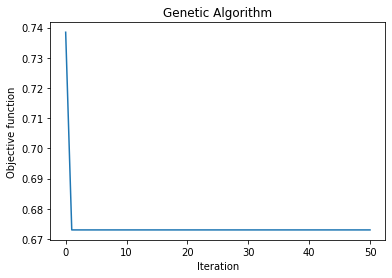

In [59]:
max_layers = (6,10,10,10,10,1)

num_dim_ga_encoding = compute_ga_encoding_len(max_layers)

varbound = np.array([[0,1]]*num_dim_ga_encoding)

algorithm_param = {'max_num_iteration': 50,\
                   'population_size':50,\
                   'mutation_probability':0.3,\
                   'elit_ratio': 0,\
                   'crossover_probability': 0.01,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

model=ga(function=lambda x: ga_fitness_eval_wrapper(x, max_layers, ('tanh','tanh','tanh','tanh','sigmoid')),\
            dimension=num_dim_ga_encoding,\
            variable_type='int',\
            variable_boundaries=varbound,\
            algorithm_parameters=algorithm_param,
            function_timeout  = 200000)

model.run()

In [60]:
get_num_layers_from_ga_encoding(model.output_dict['variable'], max_layers)

[9, 10, 10, 10, 1]

Storing the output

In [70]:
num_layers_connectivity_encoding_output = model.output_dict
num_layers_connectivity_encoding_output.update({'Report':model.report})

In [74]:
num_layers_connectivity_encoding_output['variable'] = list(num_layers_connectivity_encoding_output['variable'])

In [75]:
with open('connectivity_encoding.json', 'w') as fp:
    json.dump(num_layers_connectivity_encoding_output, fp)

Encoding using by the number of hidden neurons within the hidden layer

In [89]:
def ga_num_encoding_fitness_eval_wrapper(num_hid_neu, max_layers, activation_fn_lst):
    
    dl = custom_deep_learning(X_train_t, Y_train_t, max_layers, activation_fn_lst)
    dl.L_layer_model_run()
    
    layers_dims = [6]+num_hid_neu+[1]
    
    _, Y_pred_train_prob = dl.predict(X_train_t)
    _, Y_pred_test_prob = dl.predict(X_test_t)
    fitness = fitness_eval(Y_pred_train_prob, Y_pred_test_prob, Y_train_t, Y_test_t, layers_dims, max_layers)
    
    return fitness

 The best solution found:                                                                           
 [ 7.  5.  7. 10.]

 Objective function:
 0.38319813904929295


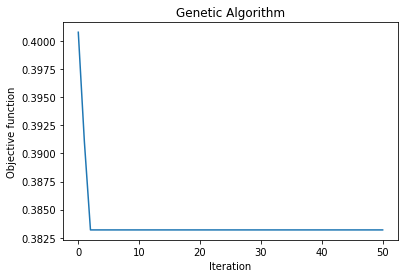

In [113]:
max_layers = (6,10,10,10,10,1)

varbound = np.array([[5,10]]*4)

algorithm_param = {'max_num_iteration': 50,\
                   'population_size':50,\
                   'mutation_probability':0.3,\
                   'elit_ratio': 0,\
                   'crossover_probability': 0.01,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

model_num=ga(function=lambda x: ga_num_encoding_fitness_eval_wrapper(x, max_layers, ('tanh','tanh','tanh','tanh','sigmoid')),\
            dimension=4,\
            variable_type='int',\
            variable_boundaries=varbound,\
            algorithm_parameters=algorithm_param,\
            function_timeout  = 200000)

model_num.run()

In [114]:
num_hid_neu_encoding_output = model_num.output_dict
num_hid_neu_encoding_output.update({'Report':model_num.report})
num_hid_neu_encoding_output['variable'] = list(num_hid_neu_encoding_output['variable'])

# Export to json
date = datetime.datetime.now()
date = date.strftime('%d_%b_%Y_%H_%M')
with open('hidden_neurons_encoding'+ date +'.json', 'w') as fp:
    json.dump(num_hid_neu_encoding_output, fp)

## Part 2 of Task 2

Using the "better" configuration of the init_encoding, we can do ga evolution of the the initialisation function

In [90]:
def ga_evolve_init(init_encoding, layers_dims, activation_fn_lst):
    
    dl = custom_deep_learning(X_train_t, Y_train_t, layers_dims, activation_fn_lst)
    dl.L_layer_model_run(init_encoding = init_encoding)
    
    _, Y_pred_train_prob = dl.predict(X_train_t)
    _, Y_pred_test_prob = dl.predict(X_test_t)
    
    # Evaluate the training loss
    train_loss = binary_cross_entropy(Y_pred_train_prob, Y_train_t)
    
    # Evaluate the test loss
    test_loss = binary_cross_entropy(Y_pred_test_prob, Y_test_t)
    
    fitness = 0.5 * train_loss + 0.5 * test_loss
    
    return fitness

 The best solution found:                                                                           
 [0. 1. 0. 0.]

 Objective function:
 0.17072600489350157


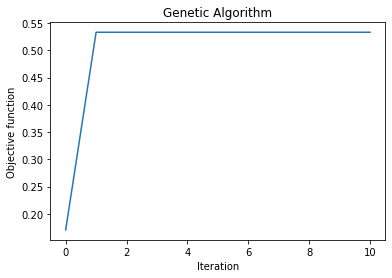

In [116]:
# KIV TO CHANGE ACCORDINGLY layers_dims etc.
layers_dims = (6,7,5,7,10,1)

varbound = np.array([[0,1]]*4)

algorithm_param = {'max_num_iteration': 10,\
                   'population_size':50,\
                   'mutation_probability':0.3,\
                   'elit_ratio': 0,\
                   'crossover_probability': 0.01,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

model_num=ga(function=lambda x: ga_evolve_init(x, layers_dims, ('tanh','tanh','tanh','tanh','sigmoid')),\
            dimension=4,\
            variable_type='int',\
            variable_boundaries=varbound,\
            algorithm_parameters=algorithm_param,\
            function_timeout  = 200000)

model_num.run()

In [117]:
init_encoding_output = model_num.output_dict
init_encoding_output.update({'Report':model_num.report})
init_encoding_output['variable'] = list(init_encoding_output['variable'])

# Export to json
date = datetime.datetime.now()
date = date.strftime('%d_%b_%Y_%H_%M')
with open('init_encoding_output'+ date +'.json', 'w') as fp:
    json.dump(init_encoding_output, fp)

## Part 3 of Task 2

In [91]:
gen_grid = [10,25]
pop_grid = [10,25,50]
mut_grid = [0.01,0.1,0.3,0.5]
crossover_grid = [0.01,0.1,0.3,0.5]

 The best solution found:                                                                           
 [6. 9. 7. 6.]

 Objective function:
 0.39400894986010376


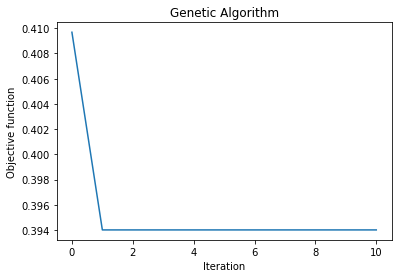

Generations: 10, Population Size: 10, Mutation Probability: 0.01, Crossover Probability: 0.01
 The best solution found:                                                                           
 [6. 9. 9. 6.]

 Objective function:
 0.40968462553577945


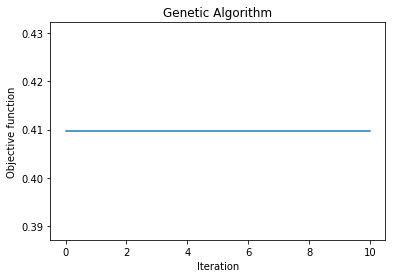

Generations: 10, Population Size: 10, Mutation Probability: 0.01, Crossover Probability: 0.1
 The best solution found:                                                                           
 [6. 9. 9. 6.]

 Objective function:
 0.40968462553577945


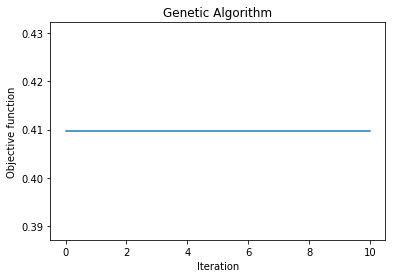

Generations: 10, Population Size: 10, Mutation Probability: 0.01, Crossover Probability: 0.3
 The best solution found:                                                                           
 [6. 9. 9. 6.]

 Objective function:
 0.40968462553577945


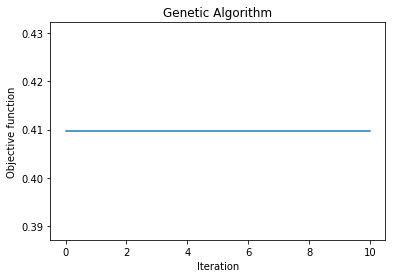

Generations: 10, Population Size: 10, Mutation Probability: 0.01, Crossover Probability: 0.5
 The best solution found:                                                                           
 [6. 9. 7. 6.]

 Objective function:
 0.39400894986010376


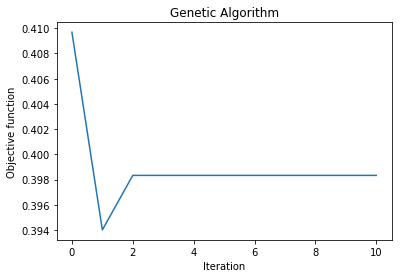

Generations: 10, Population Size: 10, Mutation Probability: 0.1, Crossover Probability: 0.01
 The best solution found:                                                                           
 [6. 9. 9. 6.]

 Objective function:
 0.40968462553577945


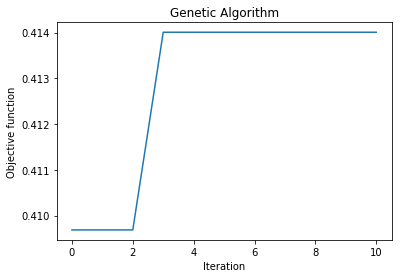

Generations: 10, Population Size: 10, Mutation Probability: 0.1, Crossover Probability: 0.1
 The best solution found:                                                                           
 [6. 9. 9. 6.]

 Objective function:
 0.40968462553577945


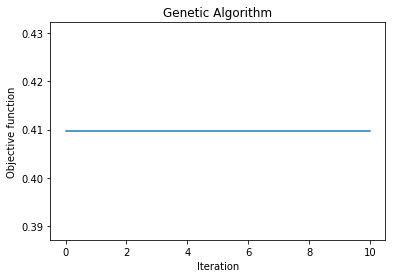

Generations: 10, Population Size: 10, Mutation Probability: 0.1, Crossover Probability: 0.3
 The best solution found:                                                                           
 [6. 9. 9. 6.]

 Objective function:
 0.40968462553577945


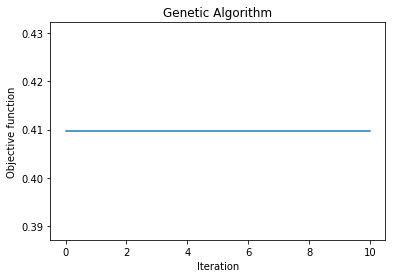

Generations: 10, Population Size: 10, Mutation Probability: 0.1, Crossover Probability: 0.5
 The best solution found:                                                                           
 [6. 9. 7. 6.]

 Objective function:
 0.39400894986010376


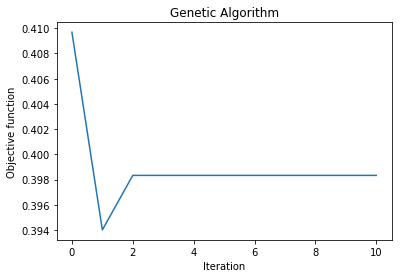

Generations: 10, Population Size: 10, Mutation Probability: 0.3, Crossover Probability: 0.01
 The best solution found:                                                                           
 [6. 9. 9. 6.]

 Objective function:
 0.40968462553577945


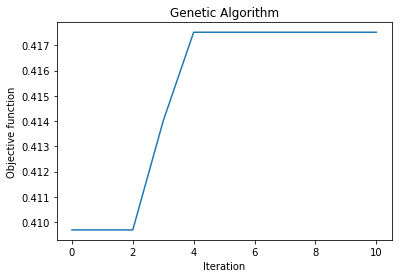

Generations: 10, Population Size: 10, Mutation Probability: 0.3, Crossover Probability: 0.1
 The best solution found:                                                                           
 [6. 9. 9. 6.]

 Objective function:
 0.40968462553577945


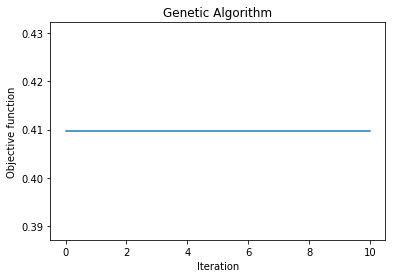

Generations: 10, Population Size: 10, Mutation Probability: 0.3, Crossover Probability: 0.3
 The best solution found:                                                                           
 [6. 9. 9. 6.]

 Objective function:
 0.40968462553577945


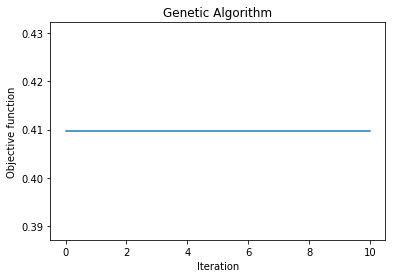

Generations: 10, Population Size: 10, Mutation Probability: 0.3, Crossover Probability: 0.5
 The best solution found:                                                                           
 [6. 9. 5. 8.]

 Objective function:
 0.3848197606709146


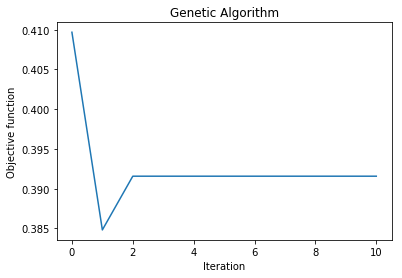

Generations: 10, Population Size: 10, Mutation Probability: 0.5, Crossover Probability: 0.01
 The best solution found:                                                                           
 [6. 9. 8. 7.]

 Objective function:
 0.4059008417519957


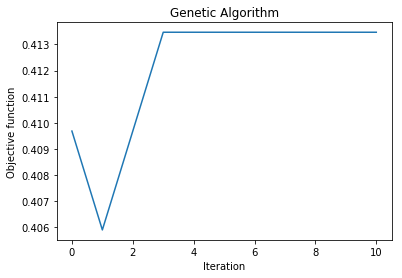

Generations: 10, Population Size: 10, Mutation Probability: 0.5, Crossover Probability: 0.1
 The best solution found:                                                                           
 [8. 9. 6. 6.]

 Objective function:
 0.3948197606709146


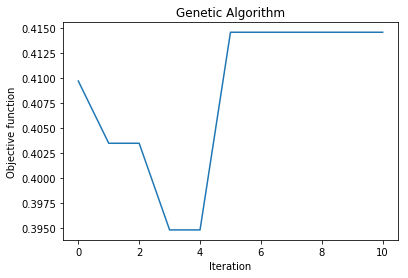

Generations: 10, Population Size: 10, Mutation Probability: 0.5, Crossover Probability: 0.3
 The best solution found:                                                                           
 [8. 9. 6. 6.]

 Objective function:
 0.3948197606709146


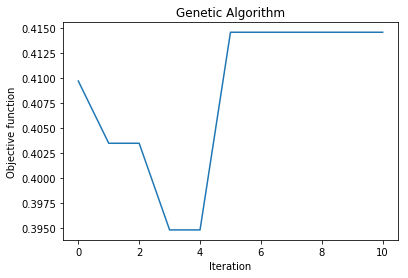

Generations: 10, Population Size: 10, Mutation Probability: 0.5, Crossover Probability: 0.5
 The best solution found:                                                                           
 [6. 9. 9. 6.]

 Objective function:
 0.40968462553577945


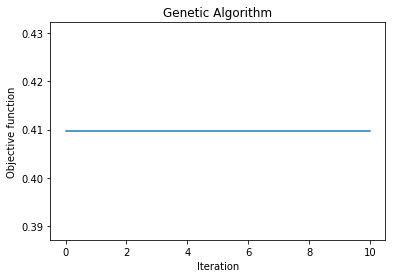

Generations: 10, Population Size: 25, Mutation Probability: 0.01, Crossover Probability: 0.01
 The best solution found:                                                                           
 [6. 9. 9. 6.]

 Objective function:
 0.40968462553577945


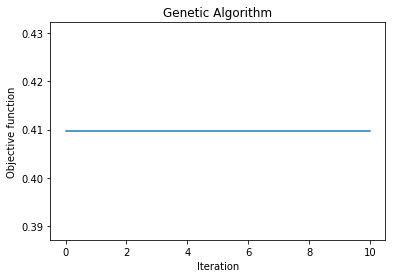

Generations: 10, Population Size: 25, Mutation Probability: 0.01, Crossover Probability: 0.1
 The best solution found:                                                                           
 [6. 9. 9. 6.]

 Objective function:
 0.40968462553577945


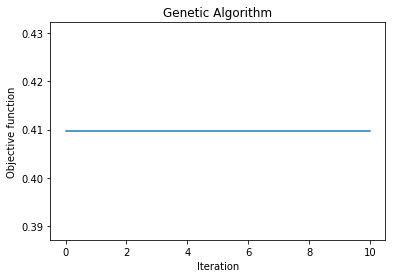

Generations: 10, Population Size: 25, Mutation Probability: 0.01, Crossover Probability: 0.3
 The best solution found:                                                                           
 [6. 9. 9. 6.]

 Objective function:
 0.40968462553577945


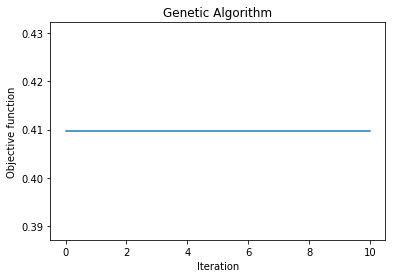

Generations: 10, Population Size: 25, Mutation Probability: 0.01, Crossover Probability: 0.5
 The best solution found:                                                                           
 [6. 9. 9. 6.]

 Objective function:
 0.40968462553577945


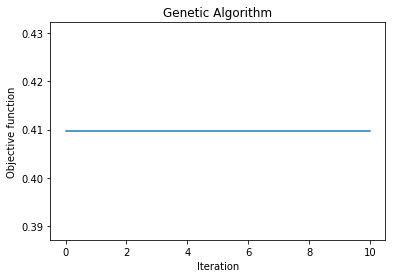

Generations: 10, Population Size: 25, Mutation Probability: 0.1, Crossover Probability: 0.01
 The best solution found:                                                                           
 [6. 6. 9. 6.]

 Objective function:
 0.38617111202226595


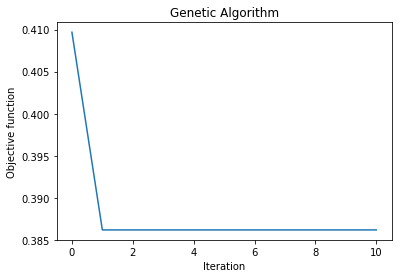

Generations: 10, Population Size: 25, Mutation Probability: 0.1, Crossover Probability: 0.1
 The best solution found:                                                                           
 [6. 9. 9. 6.]

 Objective function:
 0.40968462553577945


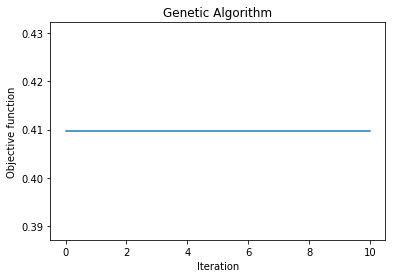

Generations: 10, Population Size: 25, Mutation Probability: 0.1, Crossover Probability: 0.3
 The best solution found:                                                                           
 [6. 9. 9. 6.]

 Objective function:
 0.40968462553577945


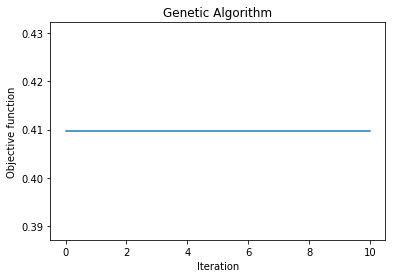

Generations: 10, Population Size: 25, Mutation Probability: 0.1, Crossover Probability: 0.5
 The best solution found:                                                                           
 [6. 8. 9. 6.]

 Objective function:
 0.4018467876979416


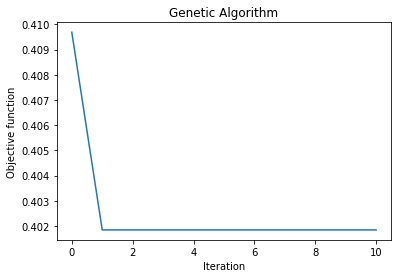

Generations: 10, Population Size: 25, Mutation Probability: 0.3, Crossover Probability: 0.01
 The best solution found:                                                                           
 [6. 9. 9. 6.]

 Objective function:
 0.40968462553577945


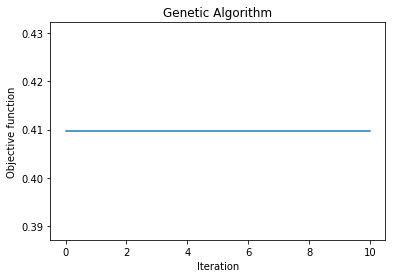

Generations: 10, Population Size: 25, Mutation Probability: 0.3, Crossover Probability: 0.1
 The best solution found:                                                                           
 [6. 9. 9. 6.]

 Objective function:
 0.40968462553577945


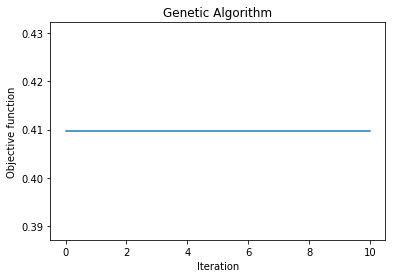

Generations: 10, Population Size: 25, Mutation Probability: 0.3, Crossover Probability: 0.3
 The best solution found:                                                                           
 [6. 9. 9. 6.]

 Objective function:
 0.40968462553577945


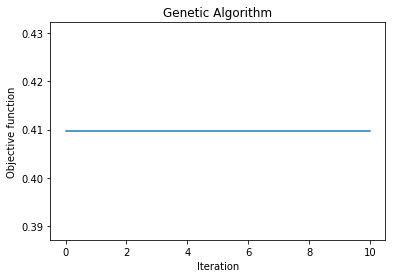

Generations: 10, Population Size: 25, Mutation Probability: 0.3, Crossover Probability: 0.5
 The best solution found:                                                                           
 [10.  5.  6.  6.]

 Objective function:
 0.3710359768871308


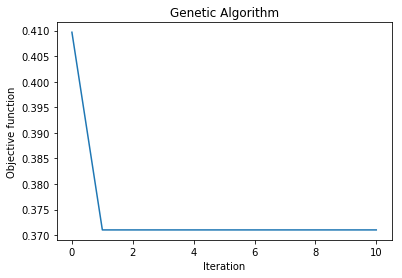

Generations: 10, Population Size: 25, Mutation Probability: 0.5, Crossover Probability: 0.01
 The best solution found:                                                                           
 [ 6.  9.  5. 10.]

 Objective function:
 0.39130624715740103


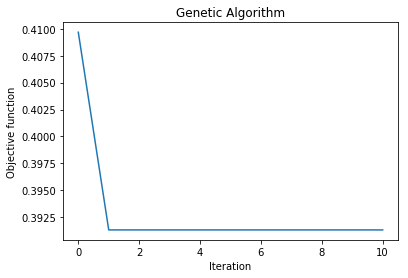

Generations: 10, Population Size: 25, Mutation Probability: 0.5, Crossover Probability: 0.1
 The best solution found:                                                                           
 [ 6.  5. 10.  5.]

 Objective function:
 0.3804954363465902


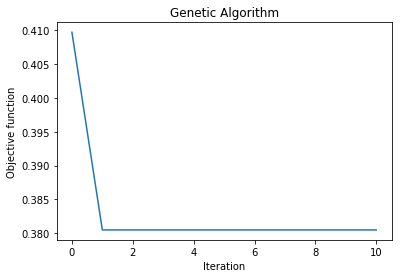

Generations: 10, Population Size: 25, Mutation Probability: 0.5, Crossover Probability: 0.3
 The best solution found:                                                                           
 [10.  5.  7.  5.]

 Objective function:
 0.3740089498601038


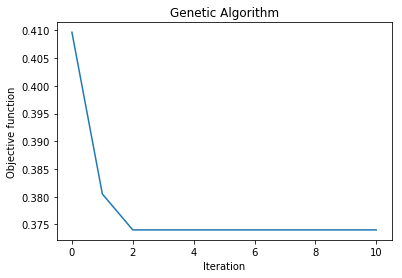

Generations: 10, Population Size: 25, Mutation Probability: 0.5, Crossover Probability: 0.5
 The best solution found:                                                                           
 [6. 9. 9. 6.]

 Objective function:
 0.40968462553577945


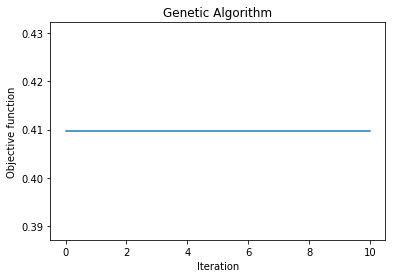

Generations: 10, Population Size: 50, Mutation Probability: 0.01, Crossover Probability: 0.01
 The best solution found:                                                                           
 [6. 9. 9. 6.]

 Objective function:
 0.40968462553577945


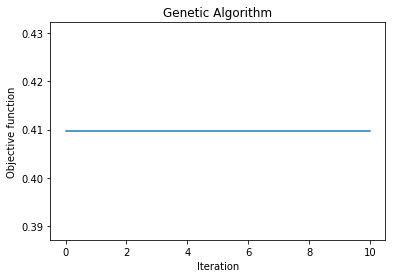

Generations: 10, Population Size: 50, Mutation Probability: 0.01, Crossover Probability: 0.1
 The best solution found:                                                                           
 [6. 9. 9. 6.]

 Objective function:
 0.40968462553577945


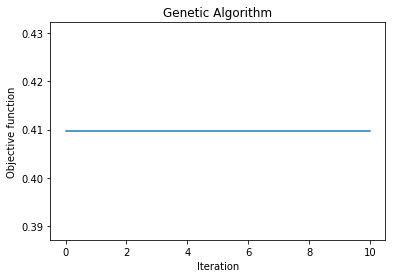

Generations: 10, Population Size: 50, Mutation Probability: 0.01, Crossover Probability: 0.3
 The best solution found:                                                                           
 [6. 9. 9. 6.]

 Objective function:
 0.40968462553577945


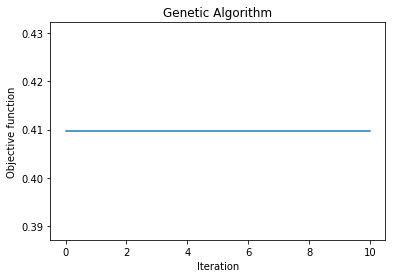

Generations: 10, Population Size: 50, Mutation Probability: 0.01, Crossover Probability: 0.5
 The best solution found:                                                                           
 [6. 9. 9. 6.]

 Objective function:
 0.40968462553577945


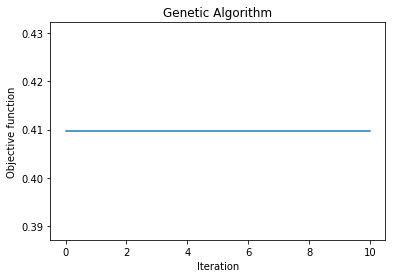

Generations: 10, Population Size: 50, Mutation Probability: 0.1, Crossover Probability: 0.01
 The best solution found:                                                                           
 [6. 9. 9. 6.]

 Objective function:
 0.40968462553577945


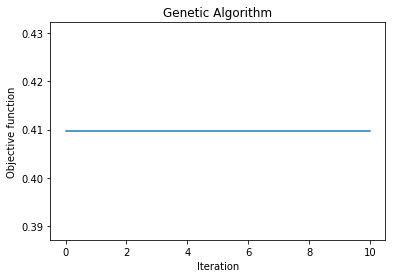

Generations: 10, Population Size: 50, Mutation Probability: 0.1, Crossover Probability: 0.1
 The best solution found:                                                                           
 [6. 9. 9. 6.]

 Objective function:
 0.40968462553577945


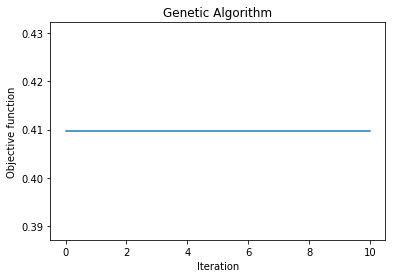

Generations: 10, Population Size: 50, Mutation Probability: 0.1, Crossover Probability: 0.3
 The best solution found:                                                                           
 [6. 9. 9. 6.]

 Objective function:
 0.40968462553577945


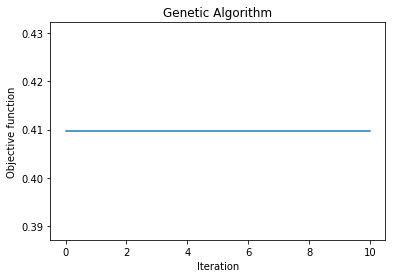

Generations: 10, Population Size: 50, Mutation Probability: 0.1, Crossover Probability: 0.5
 The best solution found:                                                                           
 [6. 9. 7. 6.]

 Objective function:
 0.39400894986010376


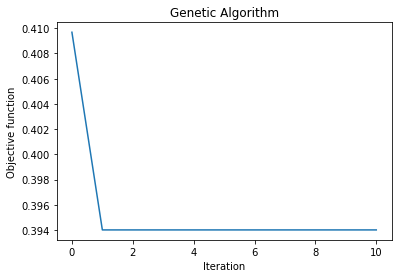

Generations: 10, Population Size: 50, Mutation Probability: 0.3, Crossover Probability: 0.01
 The best solution found:                                                                           
 [6. 9. 9. 6.]

 Objective function:
 0.40968462553577945


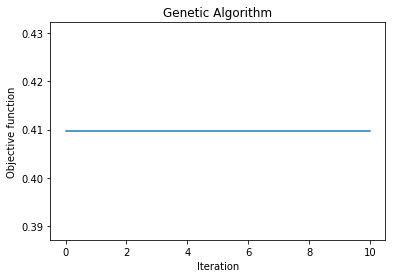

Generations: 10, Population Size: 50, Mutation Probability: 0.3, Crossover Probability: 0.1
 The best solution found:                                                                           
 [6. 9. 9. 6.]

 Objective function:
 0.40968462553577945


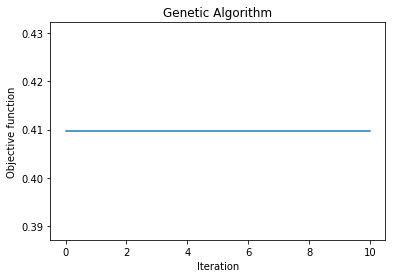

Generations: 10, Population Size: 50, Mutation Probability: 0.3, Crossover Probability: 0.3
 The best solution found:                                                                           
 [6. 9. 9. 6.]

 Objective function:
 0.40968462553577945


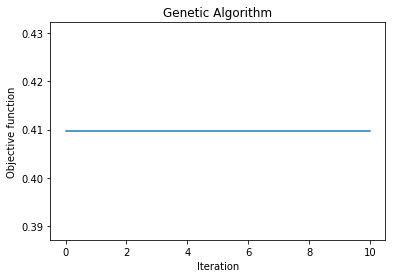

Generations: 10, Population Size: 50, Mutation Probability: 0.3, Crossover Probability: 0.5
 The best solution found:                                                                           
 [6. 9. 9. 6.]

 Objective function:
 0.40968462553577945


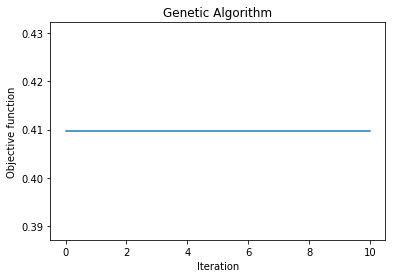

Generations: 10, Population Size: 50, Mutation Probability: 0.5, Crossover Probability: 0.01
 The best solution found:                                                                           
 [10.  9.  6.  6.]

 Objective function:
 0.40346840931956324


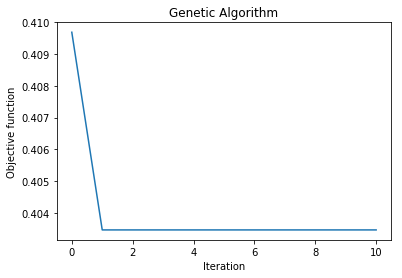

Generations: 10, Population Size: 50, Mutation Probability: 0.5, Crossover Probability: 0.1
 The best solution found:                                                                           
 [10.  6.  7.  6.]

 Objective function:
 0.38617111202226595


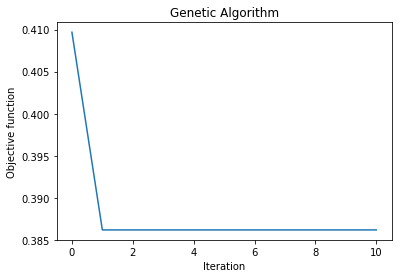

Generations: 10, Population Size: 50, Mutation Probability: 0.5, Crossover Probability: 0.3
 The best solution found:                                                                           
 [6. 9. 6. 6.]

 Objective function:
 0.38617111202226595


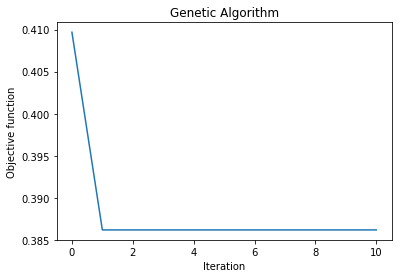

Generations: 10, Population Size: 50, Mutation Probability: 0.5, Crossover Probability: 0.5
 The best solution found:                                                                           
 [6. 9. 7. 6.]

 Objective function:
 0.39400894986010376


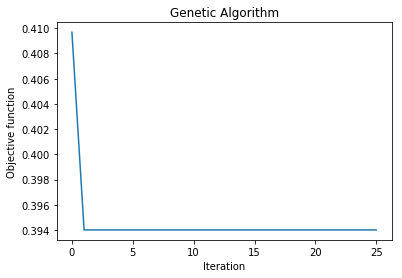

Generations: 25, Population Size: 10, Mutation Probability: 0.01, Crossover Probability: 0.01
 The best solution found:                                                                           
 [6. 9. 9. 6.]

 Objective function:
 0.40968462553577945


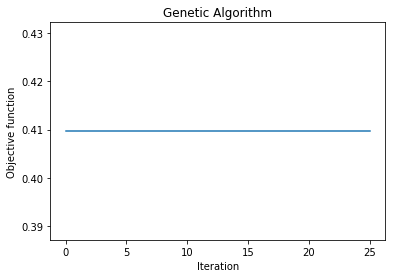

Generations: 25, Population Size: 10, Mutation Probability: 0.01, Crossover Probability: 0.1
 The best solution found:                                                                           
 [6. 9. 9. 6.]

 Objective function:
 0.40968462553577945


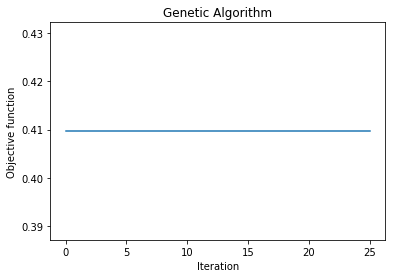

Generations: 25, Population Size: 10, Mutation Probability: 0.01, Crossover Probability: 0.3
 The best solution found:                                                                           
 [6. 9. 9. 6.]

 Objective function:
 0.40968462553577945


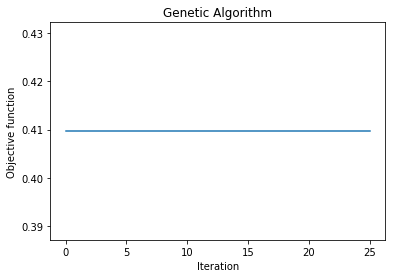

Generations: 25, Population Size: 10, Mutation Probability: 0.01, Crossover Probability: 0.5
 The best solution found:                                                                           
 [6. 9. 7. 6.]

 Objective function:
 0.39400894986010376


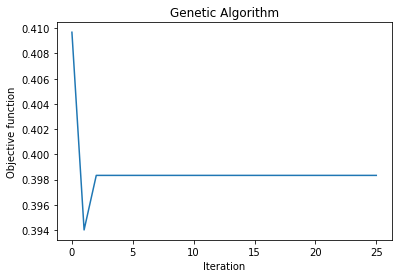

Generations: 25, Population Size: 10, Mutation Probability: 0.1, Crossover Probability: 0.01
 The best solution found:                                                                           
 [6. 9. 9. 6.]

 Objective function:
 0.40968462553577945


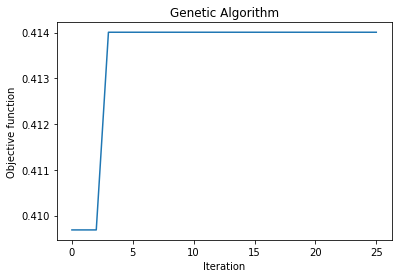

Generations: 25, Population Size: 10, Mutation Probability: 0.1, Crossover Probability: 0.1
 The best solution found:                                                                           
 [6. 9. 9. 6.]

 Objective function:
 0.40968462553577945


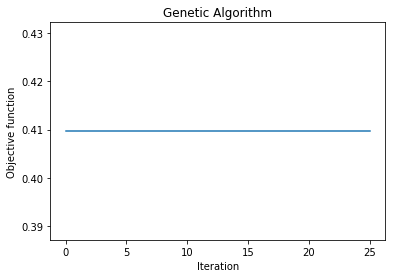

Generations: 25, Population Size: 10, Mutation Probability: 0.1, Crossover Probability: 0.3
||||||||||||||||||||______________________________ 40.0% GA is running...

KeyboardInterrupt: 

In [96]:
max_layers = (6,10,10,10,10,1)

varbound = np.array([[5,10]]*4)

for i in gen_grid:
    for j in pop_grid:
        for k in mut_grid:
            for l in crossover_grid:

                algorithm_param = {'max_num_iteration': i,\
                                   'population_size':j,\
                                   'mutation_probability':k,\
                                   'elit_ratio': 0,\
                                   'crossover_probability': l,\
                                   'parents_portion': 0.3,\
                                   'crossover_type':'uniform',\
                                   'max_iteration_without_improv':None}

                model_num_grid=ga(function=lambda x: ga_num_encoding_fitness_eval_wrapper(x, max_layers, ('tanh','tanh','tanh','tanh','sigmoid')),\
                                dimension=4,\
                                variable_type='int',\
                                variable_boundaries=varbound,\
                                algorithm_parameters=algorithm_param,\
                                function_timeout  = 200000)

                model_num_grid.run()
                
                num_hid_neu_encoding_grid_output = model_num_grid.output_dict
                num_hid_neu_encoding_grid_output.update({'Report':model_num_grid.report})
                num_hid_neu_encoding_grid_output['variable'] = list(num_hid_neu_encoding_grid_output['variable'])
                
                string_combination = '_'.join([str(i),str(j),str(k),str(l)])

                # Export to json
                with open('num_hid_neu_encoding_grid_output' + string_combination+'.json', 'w') as fp:
                    json.dump(num_hid_neu_encoding_grid_output, fp)
                print('Generations: {}, Population Size: {}, Mutation Probability: {}, Crossover Probability: {}'.format(i,j,k,l))

In [ ]:
gen_grid = [10]
pop_grid = [10,25,50]
mut_grid = [0.01,0.1,0.3,0.5]
crossover_grid = [0.01,0.1,0.3,0.5]

fitness_dic = {}

for i in gen_grid:
    for j in pop_grid:
        for k in mut_grid:
            for l in crossover_grid:
                string_combination = '_'.join([str(i),str(j),str(k),str(l)])
                
                with open('num_hid_neu_encoding_grid_output' + string_combination+'.json', 'r') as f:
                    data = json.load(f)
                
                fitness_dic.update({string_combination: data['function']})

# Grid processing
grid_df = pd.DataFrame([fitness_dic.keys(), fitness_dic.values()]).T
grid_df[0] = grid_df[0].str.split('_')
grid_df['generations'] = grid_df[0].apply(lambda x: x[0])
grid_df['populations'] = grid_df[0].apply(lambda x: x[1])
grid_df['mutation'] = grid_df[0].apply(lambda x: x[2]) 
grid_df['crossover'] = grid_df[0].apply(lambda x: x[3])

In [ ]:
# Crossover summary
crossover_summary = grid_df.groupby('crossover')[1].agg([min,'sum', np.std, 'count'])
crossover_summary['sum'] = crossover_summary['sum']/crossover_summary['count']
crossover_summary = crossover_summary.rename(columns = {'sum':'mean'})
crossover_summary = crossover_summary.drop(columns = 'count')
crossover_summary = crossover_summary.T.round(3)
crossover_summary

In [ ]:
# Mutation summary
mutation_summary = grid_df.groupby('mutation')[1].agg([min,'sum', np.std, 'count'])
mutation_summary['sum'] = mutation_summary['sum']/mutation_summary['count']
mutation_summary = mutation_summary.rename(columns = {'sum':'mean'})
mutation_summary = mutation_summary.drop(columns = 'count')
mutation_summary = mutation_summary.T.round(3)
mutation_summary

In [ ]:
# Populations summary
population_summary = grid_df.groupby('populations')[1].agg([min, 'sum', np.std, 'count'])
population_summary['sum'] = population_summary['sum']/population_summary['count']
population_summary = population_summary.rename(columns = {'sum':'mean'})
population_summary = population_summary.drop(columns = 'count')
population_summary = population_summary.T.round(3)
population_summary